In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
import tensorflow.keras.layers as tfl
import seaborn as sns
from PIL import Image

monkeypox


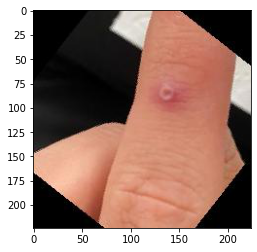

healthy


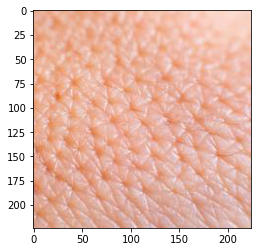

chickenpox


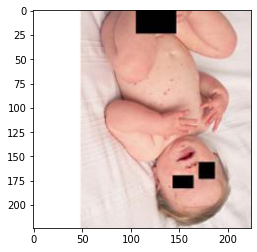

In [3]:
train_images = os.listdir('../input/monkeypox-skin-lesion-classification')
for folder in train_images :
    images = os.listdir('../input/monkeypox-skin-lesion-classification/'+str(folder))
    print(folder)
    img = mpimg.imread('../input/monkeypox-skin-lesion-classification/'+str(folder)+'/'+images[0])
    imgplot = plt.imshow(img)
    plt.show()

In [4]:
train_path = '../input/monkeypox-skin-lesion-classification/monkeypox/'
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(train_path) if isfile(join(train_path, f))]
import PIL
from PIL import Image
img = PIL.Image.open(train_path+str(files[0]))
wid, hgt = img.size
print(str(wid) + "x" + str(hgt))

224x224


In [5]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

In [6]:
Accuracy = {}

Xception
* 4 hidden layers = 1024,512,128,64
* img_size = 400x400
* introduced batch normalization and dropout
* Accuracy obtained :

In [7]:
labels = os.listdir('../input/monkeypox-skin-lesion-classification')
img_size = 224
train_dataset = image_dataset_from_directory(
    '../input/monkeypox-skin-lesion-classification',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.2,
    subset='training',
    seed=22
)
val_dataset = image_dataset_from_directory(
    '../input/monkeypox-skin-lesion-classification',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.2,
    subset='validation',
    seed=22
)
def get_model(base, preprocessor, img_size):    
    inputs = tf.keras.Input(shape=(img_size,img_size,3))
    x = RandomFlip('horizontal')(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu')(x)
    x = tfl.Dropout(0.15)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(64, activation='relu')(x)
    x = tfl.Dropout(0.3)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(3, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model

Found 21026 files belonging to 3 classes.
Using 16821 files for training.


2022-08-31 04:47:29.896679: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 21026 files belonging to 3 classes.
Using 4205 files for validation.


In [8]:
preprocess_input = tf.keras.applications.xception.preprocess_input
pre_trained_model = tf.keras.applications.Xception(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    verbose=1)

83697664/83683744 [==============================] - 0s 0us/step
Epoch 1/10


2022-08-31 04:47:39.655114: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 24:24 - loss: 1.1869 - accuracy: 0.4922

Cleanup called...


  9/526 [..............................] - ETA: 24:44 - loss: 1.0412 - accuracy: 0.5972

Cleanup called...


 10/526 [..............................] - ETA: 24:35 - loss: 1.0113 - accuracy: 0.6062

Cleanup called...


 12/526 [..............................] - ETA: 24:24 - loss: 0.9979 - accuracy: 0.6042

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 24:14 - loss: 0.9365 - accuracy: 0.6228

Cleanup called...


 15/526 [..............................] - ETA: 24:07 - loss: 0.9305 - accuracy: 0.6208

Cleanup called...


 16/526 [..............................] - ETA: 24:00 - loss: 0.9082 - accuracy: 0.6309

Cleanup called...


 20/526 [>.............................] - ETA: 23:54 - loss: 0.8616 - accuracy: 0.6531

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 23:39 - loss: 0.8170 - accuracy: 0.6658

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 23:22 - loss: 0.7920 - accuracy: 0.6806

Cleanup called...


 29/526 [>.............................] - ETA: 23:26 - loss: 0.7807 - accuracy: 0.6864

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 23:21 - loss: 0.7784 - accuracy: 0.6915

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 23:17 - loss: 0.7703 - accuracy: 0.6951

Cleanup called...


 40/526 [=>............................] - ETA: 22:55 - loss: 0.7359 - accuracy: 0.7086

Cleanup called...


 41/526 [=>............................] - ETA: 22:51 - loss: 0.7344 - accuracy: 0.7111

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 22:47 - loss: 0.7353 - accuracy: 0.7083

Cleanup called...


 47/526 [=>............................] - ETA: 22:31 - loss: 0.7135 - accuracy: 0.7207

Cleanup called...


 48/526 [=>............................] - ETA: 22:28 - loss: 0.7103 - accuracy: 0.7207

Cleanup called...


 51/526 [=>............................] - ETA: 22:24 - loss: 0.7111 - accuracy: 0.7279

Cleanup called...


 54/526 [==>...........................] - ETA: 22:14 - loss: 0.7042 - accuracy: 0.7309

Cleanup called...


 55/526 [==>...........................] - ETA: 22:10 - loss: 0.7080 - accuracy: 0.7312

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 21:55 - loss: 0.6989 - accuracy: 0.7341

Cleanup called...


 69/526 [==>...........................] - ETA: 21:25 - loss: 0.6588 - accuracy: 0.7473

Cleanup called...


 71/526 [===>..........................] - ETA: 21:19 - loss: 0.6528 - accuracy: 0.7491

Cleanup called...


 73/526 [===>..........................] - ETA: 21:13 - loss: 0.6455 - accuracy: 0.7534

Cleanup called...


 74/526 [===>..........................] - ETA: 21:13 - loss: 0.6455 - accuracy: 0.7546

Cleanup called...


 77/526 [===>..........................] - ETA: 21:04 - loss: 0.6359 - accuracy: 0.7577

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 20:38 - loss: 0.6169 - accuracy: 0.7693

Cleanup called...


 95/526 [====>.........................] - ETA: 20:10 - loss: 0.5980 - accuracy: 0.7740

Cleanup called...


 99/526 [====>.........................] - ETA: 20:01 - loss: 0.5879 - accuracy: 0.7771

Cleanup called...


100/526 [====>.........................] - ETA: 19:58 - loss: 0.5862 - accuracy: 0.7778

Cleanup called...


101/526 [====>.........................] - ETA: 19:54 - loss: 0.5829 - accuracy: 0.7788

Cleanup called...


103/526 [====>.........................] - ETA: 19:49 - loss: 0.5819 - accuracy: 0.7794

Cleanup called...


104/526 [====>.........................] - ETA: 19:46 - loss: 0.5793 - accuracy: 0.7800

Cleanup called...


109/526 [=====>........................] - ETA: 19:33 - loss: 0.5699 - accuracy: 0.7841

Cleanup called...


110/526 [=====>........................] - ETA: 19:30 - loss: 0.5685 - accuracy: 0.7841

Cleanup called...


113/526 [=====>........................] - ETA: 19:21 - loss: 0.5631 - accuracy: 0.7857

Cleanup called...


119/526 [=====>........................] - ETA: 19:06 - loss: 0.5531 - accuracy: 0.7902

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 18:50 - loss: 0.5466 - accuracy: 0.7931

Cleanup called...


129/526 [======>.......................] - ETA: 18:35 - loss: 0.5431 - accuracy: 0.7941

Cleanup called...


130/526 [======>.......................] - ETA: 18:33 - loss: 0.5398 - accuracy: 0.7957

Cleanup called...


133/526 [======>.......................] - ETA: 18:24 - loss: 0.5429 - accuracy: 0.7956

Cleanup called...


136/526 [======>.......................] - ETA: 18:15 - loss: 0.5383 - accuracy: 0.7966

Cleanup called...


139/526 [======>.......................] - ETA: 18:06 - loss: 0.5418 - accuracy: 0.7968

Cleanup called...


142/526 [=======>......................] - ETA: 17:59 - loss: 0.5385 - accuracy: 0.7975

Cleanup called...


143/526 [=======>......................] - ETA: 17:56 - loss: 0.5369 - accuracy: 0.7976

Cleanup called...


144/526 [=======>......................] - ETA: 17:53 - loss: 0.5339 - accuracy: 0.7990

Cleanup called...


148/526 [=======>......................] - ETA: 17:41 - loss: 0.5306 - accuracy: 0.8000

Cleanup called...


150/526 [=======>......................] - ETA: 17:35 - loss: 0.5270 - accuracy: 0.8012

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 17:29 - loss: 0.5252 - accuracy: 0.8012

Cleanup called...


157/526 [=======>......................] - ETA: 17:16 - loss: 0.5201 - accuracy: 0.8033

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 17:13 - loss: 0.5198 - accuracy: 0.8034

Cleanup called...


159/526 [========>.....................] - ETA: 17:10 - loss: 0.5182 - accuracy: 0.8040

Cleanup called...


160/526 [========>.....................] - ETA: 17:07 - loss: 0.5171 - accuracy: 0.8041

Cleanup called...


164/526 [========>.....................] - ETA: 16:57 - loss: 0.5150 - accuracy: 0.8051

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:54 - loss: 0.5147 - accuracy: 0.8055

Cleanup called...


168/526 [========>.....................] - ETA: 16:45 - loss: 0.5111 - accuracy: 0.8067

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:39 - loss: 0.5115 - accuracy: 0.8068

Cleanup called...


174/526 [========>.....................] - ETA: 16:28 - loss: 0.5101 - accuracy: 0.8075

Cleanup called...


176/526 [=========>....................] - ETA: 16:23 - loss: 0.5104 - accuracy: 0.8082

Cleanup called...


177/526 [=========>....................] - ETA: 16:20 - loss: 0.5105 - accuracy: 0.8084

Cleanup called...


179/526 [=========>....................] - ETA: 16:14 - loss: 0.5102 - accuracy: 0.8083

Cleanup called...


184/526 [=========>....................] - ETA: 16:00 - loss: 0.5050 - accuracy: 0.8113

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 15:54 - loss: 0.5024 - accuracy: 0.8118

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:53 - loss: 0.5005 - accuracy: 0.8127

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:41 - loss: 0.4998 - accuracy: 0.8130

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:35 - loss: 0.4981 - accuracy: 0.8131

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:32 - loss: 0.4981 - accuracy: 0.8133

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 15:19 - loss: 0.4913 - accuracy: 0.8160

Cleanup called...


200/526 [==========>...................] - ETA: 15:17 - loss: 0.4909 - accuracy: 0.8159

Cleanup called...


202/526 [==========>...................] - ETA: 15:11 - loss: 0.4897 - accuracy: 0.8161

Cleanup called...


203/526 [==========>...................] - ETA: 15:08 - loss: 0.4880 - accuracy: 0.8167

Cleanup called...


205/526 [==========>...................] - ETA: 15:02 - loss: 0.4847 - accuracy: 0.8177

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 14:56 - loss: 0.4841 - accuracy: 0.8181

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:46 - loss: 0.4796 - accuracy: 0.8193

Cleanup called...


212/526 [===========>..................] - ETA: 14:43 - loss: 0.4785 - accuracy: 0.8199

Cleanup called...


214/526 [===========>..................] - ETA: 14:37 - loss: 0.4773 - accuracy: 0.8201

Cleanup called...


215/526 [===========>..................] - ETA: 14:34 - loss: 0.4771 - accuracy: 0.8202

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:28 - loss: 0.4755 - accuracy: 0.8209

Cleanup called...


219/526 [===========>..................] - ETA: 14:23 - loss: 0.4747 - accuracy: 0.8211

Cleanup called...


220/526 [===========>..................] - ETA: 14:20 - loss: 0.4736 - accuracy: 0.8216

Cleanup called...


221/526 [===========>..................] - ETA: 14:18 - loss: 0.4730 - accuracy: 0.8215

Cleanup called...


222/526 [===========>..................] - ETA: 14:15 - loss: 0.4718 - accuracy: 0.8219

Cleanup called...


223/526 [===========>..................] - ETA: 14:12 - loss: 0.4731 - accuracy: 0.8220

Cleanup called...


225/526 [===========>..................] - ETA: 14:07 - loss: 0.4718 - accuracy: 0.8229

Cleanup called...


226/526 [===========>..................] - ETA: 14:04 - loss: 0.4712 - accuracy: 0.8231

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 13:58 - loss: 0.4703 - accuracy: 0.8232

Cleanup called...


234/526 [============>.................] - ETA: 13:41 - loss: 0.4648 - accuracy: 0.8256

Cleanup called...


239/526 [============>.................] - ETA: 13:27 - loss: 0.4624 - accuracy: 0.8264

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:21 - loss: 0.4609 - accuracy: 0.8269

Cleanup called...


252/526 [=============>................] - ETA: 12:51 - loss: 0.4554 - accuracy: 0.8282

Cleanup called...


255/526 [=============>................] - ETA: 12:42 - loss: 0.4546 - accuracy: 0.8289

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:40 - loss: 0.4537 - accuracy: 0.8291

Cleanup called...


260/526 [=============>................] - ETA: 12:28 - loss: 0.4529 - accuracy: 0.8292

Cleanup called...


261/526 [=============>................] - ETA: 12:25 - loss: 0.4521 - accuracy: 0.8294

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:22 - loss: 0.4517 - accuracy: 0.8296

Cleanup called...


263/526 [==============>...............] - ETA: 12:20 - loss: 0.4514 - accuracy: 0.8295

Cleanup called...


264/526 [==============>...............] - ETA: 12:17 - loss: 0.4505 - accuracy: 0.8298

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 12:12 - loss: 0.4504 - accuracy: 0.8298

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 12:09 - loss: 0.4495 - accuracy: 0.8299

Cleanup called...


273/526 [==============>...............] - ETA: 11:52 - loss: 0.4453 - accuracy: 0.8316

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:49 - loss: 0.4448 - accuracy: 0.8315

Cleanup called...


281/526 [===============>..............] - ETA: 11:30 - loss: 0.4418 - accuracy: 0.8323

Cleanup called...


282/526 [===============>..............] - ETA: 11:27 - loss: 0.4412 - accuracy: 0.8323

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:22 - loss: 0.4401 - accuracy: 0.8327

Cleanup called...


288/526 [===============>..............] - ETA: 11:11 - loss: 0.4366 - accuracy: 0.8338

Cleanup called...


289/526 [===============>..............] - ETA: 11:08 - loss: 0.4359 - accuracy: 0.8340

Cleanup called...


290/526 [===============>..............] - ETA: 11:05 - loss: 0.4354 - accuracy: 0.8343

Cleanup called...


294/526 [===============>..............] - ETA: 10:54 - loss: 0.4323 - accuracy: 0.8352

Cleanup called...


297/526 [===============>..............] - ETA: 10:45 - loss: 0.4313 - accuracy: 0.8359

Cleanup called...


302/526 [================>.............] - ETA: 10:32 - loss: 0.4279 - accuracy: 0.8371

Cleanup called...


310/526 [================>.............] - ETA: 10:09 - loss: 0.4214 - accuracy: 0.8400

Cleanup called...


312/526 [================>.............] - ETA: 10:03 - loss: 0.4201 - accuracy: 0.8404

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:43 - loss: 0.4194 - accuracy: 0.8410

Cleanup called...


320/526 [=================>............] - ETA: 9:40 - loss: 0.4191 - accuracy: 0.8410

Cleanup called...


321/526 [=================>............] - ETA: 9:38 - loss: 0.4186 - accuracy: 0.8413

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:35 - loss: 0.4180 - accuracy: 0.8416

Cleanup called...


326/526 [=================>............] - ETA: 9:24 - loss: 0.4155 - accuracy: 0.8426

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:18 - loss: 0.4150 - accuracy: 0.8426

Cleanup called...


335/526 [==================>...........] - ETA: 8:59 - loss: 0.4109 - accuracy: 0.8441

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:56 - loss: 0.4104 - accuracy: 0.8443

Cleanup called...


341/526 [==================>...........] - ETA: 8:41 - loss: 0.4088 - accuracy: 0.8448

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:36 - loss: 0.4083 - accuracy: 0.8451

Cleanup called...


347/526 [==================>...........] - ETA: 8:25 - loss: 0.4054 - accuracy: 0.8462

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:16 - loss: 0.4040 - accuracy: 0.8470

Cleanup called...


359/526 [===================>..........] - ETA: 7:51 - loss: 0.3999 - accuracy: 0.8485

Cleanup called...


360/526 [===================>..........] - ETA: 7:48 - loss: 0.3996 - accuracy: 0.8486

Cleanup called...


361/526 [===================>..........] - ETA: 7:45 - loss: 0.3993 - accuracy: 0.8488

Cleanup called...


362/526 [===================>..........] - ETA: 7:42 - loss: 0.3988 - accuracy: 0.8488

Cleanup called...


363/526 [===================>..........] - ETA: 7:40 - loss: 0.3985 - accuracy: 0.8490

Cleanup called...


365/526 [===================>..........] - ETA: 7:34 - loss: 0.3973 - accuracy: 0.8495

Cleanup called...


368/526 [===================>..........] - ETA: 7:26 - loss: 0.3967 - accuracy: 0.8496

Cleanup called...


373/526 [====================>.........] - ETA: 7:11 - loss: 0.3942 - accuracy: 0.8506

Cleanup called...


374/526 [====================>.........] - ETA: 7:09 - loss: 0.3941 - accuracy: 0.8507

Cleanup called...


376/526 [====================>.........] - ETA: 7:03 - loss: 0.3929 - accuracy: 0.8512

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:52 - loss: 0.3905 - accuracy: 0.8521

Cleanup called...


381/526 [====================>.........] - ETA: 6:49 - loss: 0.3905 - accuracy: 0.8523

Cleanup called...


387/526 [=====================>........] - ETA: 6:32 - loss: 0.3876 - accuracy: 0.8531

Cleanup called...


389/526 [=====================>........] - ETA: 6:26 - loss: 0.3865 - accuracy: 0.8535

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:18 - loss: 0.3851 - accuracy: 0.8540

Cleanup called...


404/526 [======================>.......] - ETA: 5:44 - loss: 0.3789 - accuracy: 0.8564

Cleanup called...


407/526 [======================>.......] - ETA: 5:36 - loss: 0.3777 - accuracy: 0.8566

Cleanup called...


409/526 [======================>.......] - ETA: 5:30 - loss: 0.3767 - accuracy: 0.8570

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:27 - loss: 0.3762 - accuracy: 0.8573

Cleanup called...


411/526 [======================>.......] - ETA: 5:24 - loss: 0.3754 - accuracy: 0.8577

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:22 - loss: 0.3748 - accuracy: 0.8579

Cleanup called...


413/526 [======================>.......] - ETA: 5:19 - loss: 0.3744 - accuracy: 0.8582

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:13 - loss: 0.3749 - accuracy: 0.8581

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 5:04 - loss: 0.3741 - accuracy: 0.8584

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 5:02 - loss: 0.3734 - accuracy: 0.8586

Cleanup called...


422/526 [=======================>......] - ETA: 4:53 - loss: 0.3718 - accuracy: 0.8593

Cleanup called...


425/526 [=======================>......] - ETA: 4:45 - loss: 0.3701 - accuracy: 0.8599

Cleanup called...


430/526 [=======================>......] - ETA: 4:31 - loss: 0.3683 - accuracy: 0.8605

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:22 - loss: 0.3670 - accuracy: 0.8610

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:08 - loss: 0.3654 - accuracy: 0.8617

Cleanup called...


439/526 [========================>.....] - ETA: 4:05 - loss: 0.3649 - accuracy: 0.8618

Cleanup called...


440/526 [========================>.....] - ETA: 4:02 - loss: 0.3657 - accuracy: 0.8616

Cleanup called...


441/526 [========================>.....] - ETA: 4:00 - loss: 0.3652 - accuracy: 0.8618

Cleanup called...


444/526 [========================>.....] - ETA: 3:51 - loss: 0.3637 - accuracy: 0.8623

Cleanup called...


447/526 [========================>.....] - ETA: 3:43 - loss: 0.3629 - accuracy: 0.8625

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:31 - loss: 0.3614 - accuracy: 0.8632

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:28 - loss: 0.3609 - accuracy: 0.8634

Cleanup called...


456/526 [=========================>....] - ETA: 3:17 - loss: 0.3589 - accuracy: 0.8642

Cleanup called...


457/526 [=========================>....] - ETA: 3:14 - loss: 0.3585 - accuracy: 0.8644

Cleanup called...


460/526 [=========================>....] - ETA: 3:06 - loss: 0.3574 - accuracy: 0.8647

Cleanup called...


461/526 [=========================>....] - ETA: 3:03 - loss: 0.3571 - accuracy: 0.8648

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:52 - loss: 0.3552 - accuracy: 0.8655

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:43 - loss: 0.3541 - accuracy: 0.8659

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:32 - loss: 0.3527 - accuracy: 0.8665

Cleanup called...


478/526 [==========================>...] - ETA: 2:15 - loss: 0.3504 - accuracy: 0.8672

Cleanup called...


483/526 [==========================>...] - ETA: 2:01 - loss: 0.3484 - accuracy: 0.8680

Cleanup called...


489/526 [==========================>...] - ETA: 1:44 - loss: 0.3468 - accuracy: 0.8686

Cleanup called...


494/526 [===========================>..] - ETA: 1:30 - loss: 0.3453 - accuracy: 0.8693

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:19 - loss: 0.3436 - accuracy: 0.8702

Cleanup called...


503/526 [===========================>..] - ETA: 1:05 - loss: 0.3427 - accuracy: 0.8706

Cleanup called...


504/526 [===========================>..] - ETA: 1:02 - loss: 0.3425 - accuracy: 0.8706

Cleanup called...


506/526 [===========================>..] - ETA: 56s - loss: 0.3420 - accuracy: 0.8707

Cleanup called...


507/526 [===========================>..] - ETA: 53s - loss: 0.3417 - accuracy: 0.8708

Cleanup called...


508/526 [===========================>..] - ETA: 50s - loss: 0.3424 - accuracy: 0.8706

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 39s - loss: 0.3411 - accuracy: 0.8711

Cleanup called...


526/526 [==============================] - 1837s 3s/step - loss: 0.3369 - accuracy: 0.8727 - val_loss: 0.3727 - val_accuracy: 0.8709
Epoch 2/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 23:47 - loss: 0.2252 - accuracy: 0.9609

Cleanup called...


  9/526 [..............................] - ETA: 23:29 - loss: 0.2031 - accuracy: 0.9479

Cleanup called...


 10/526 [..............................] - ETA: 23:26 - loss: 0.1950 - accuracy: 0.9500

Cleanup called...


 12/526 [..............................] - ETA: 23:47 - loss: 0.2161 - accuracy: 0.9427

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 23:39 - loss: 0.2175 - accuracy: 0.9442

Cleanup called...


 15/526 [..............................] - ETA: 23:39 - loss: 0.2121 - accuracy: 0.9438

Cleanup called...


 16/526 [..............................] - ETA: 23:36 - loss: 0.2078 - accuracy: 0.9453

Cleanup called...


 20/526 [>.............................] - ETA: 23:26 - loss: 0.1868 - accuracy: 0.9469

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 23:34 - loss: 0.1891 - accuracy: 0.9416

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 23:19 - loss: 0.1846 - accuracy: 0.9410

Cleanup called...


 29/526 [>.............................] - ETA: 23:10 - loss: 0.1806 - accuracy: 0.9429

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 23:02 - loss: 0.1795 - accuracy: 0.9415

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 23:04 - loss: 0.1816 - accuracy: 0.9403

Cleanup called...


 40/526 [=>............................] - ETA: 22:44 - loss: 0.1742 - accuracy: 0.9438

Cleanup called...


 41/526 [=>............................] - ETA: 22:40 - loss: 0.1725 - accuracy: 0.9428

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 22:37 - loss: 0.1824 - accuracy: 0.9412

Cleanup called...


 47/526 [=>............................] - ETA: 22:28 - loss: 0.1809 - accuracy: 0.9422

Cleanup called...


 48/526 [=>............................] - ETA: 22:26 - loss: 0.1803 - accuracy: 0.9414

Cleanup called...


 51/526 [=>............................] - ETA: 22:15 - loss: 0.1808 - accuracy: 0.9418

Cleanup called...


 54/526 [==>...........................] - ETA: 22:04 - loss: 0.1825 - accuracy: 0.9421

Cleanup called...


 55/526 [==>...........................] - ETA: 22:01 - loss: 0.1850 - accuracy: 0.9409

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 21:53 - loss: 0.1842 - accuracy: 0.9401

Cleanup called...


 69/526 [==>...........................] - ETA: 21:26 - loss: 0.1878 - accuracy: 0.9375

Cleanup called...


 71/526 [===>..........................] - ETA: 21:19 - loss: 0.1856 - accuracy: 0.9388

Cleanup called...


 73/526 [===>..........................] - ETA: 21:13 - loss: 0.1826 - accuracy: 0.9401

Cleanup called...


 74/526 [===>..........................] - ETA: 21:10 - loss: 0.1829 - accuracy: 0.9392

Cleanup called...


 77/526 [===>..........................] - ETA: 21:00 - loss: 0.1807 - accuracy: 0.9403

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 20:36 - loss: 0.1813 - accuracy: 0.9404

Cleanup called...


 95/526 [====>.........................] - ETA: 20:10 - loss: 0.1814 - accuracy: 0.9391

Cleanup called...


 99/526 [====>.........................] - ETA: 19:58 - loss: 0.1825 - accuracy: 0.9391

Cleanup called...


100/526 [====>.........................] - ETA: 19:55 - loss: 0.1821 - accuracy: 0.9394

Cleanup called...


101/526 [====>.........................] - ETA: 19:55 - loss: 0.1810 - accuracy: 0.9400

Cleanup called...


103/526 [====>.........................] - ETA: 19:49 - loss: 0.1805 - accuracy: 0.9399

Cleanup called...


104/526 [====>.........................] - ETA: 19:46 - loss: 0.1799 - accuracy: 0.9399

Cleanup called...


109/526 [=====>........................] - ETA: 19:32 - loss: 0.1807 - accuracy: 0.9401

Cleanup called...


110/526 [=====>........................] - ETA: 19:28 - loss: 0.1808 - accuracy: 0.9401

Cleanup called...


113/526 [=====>........................] - ETA: 19:22 - loss: 0.1802 - accuracy: 0.9400

Cleanup called...


119/526 [=====>........................] - ETA: 19:05 - loss: 0.1818 - accuracy: 0.9393

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 18:51 - loss: 0.1836 - accuracy: 0.9385

Cleanup called...


129/526 [======>.......................] - ETA: 18:37 - loss: 0.1844 - accuracy: 0.9380

Cleanup called...


130/526 [======>.......................] - ETA: 18:34 - loss: 0.1838 - accuracy: 0.9382

Cleanup called...


133/526 [======>.......................] - ETA: 18:25 - loss: 0.1831 - accuracy: 0.9382

Cleanup called...


136/526 [======>.......................] - ETA: 18:18 - loss: 0.1824 - accuracy: 0.9389

Cleanup called...


139/526 [======>.......................] - ETA: 18:09 - loss: 0.1814 - accuracy: 0.9388

Cleanup called...


142/526 [=======>......................] - ETA: 18:00 - loss: 0.1812 - accuracy: 0.9386

Cleanup called...


143/526 [=======>......................] - ETA: 17:57 - loss: 0.1810 - accuracy: 0.9388

Cleanup called...


144/526 [=======>......................] - ETA: 17:54 - loss: 0.1813 - accuracy: 0.9388

Cleanup called...


148/526 [=======>......................] - ETA: 17:44 - loss: 0.1802 - accuracy: 0.9394

Cleanup called...


150/526 [=======>......................] - ETA: 17:38 - loss: 0.1805 - accuracy: 0.9396

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 17:32 - loss: 0.1794 - accuracy: 0.9400

Cleanup called...


157/526 [=======>......................] - ETA: 17:18 - loss: 0.1789 - accuracy: 0.9395

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 17:15 - loss: 0.1794 - accuracy: 0.9393

Cleanup called...


159/526 [========>.....................] - ETA: 17:13 - loss: 0.1793 - accuracy: 0.9393

Cleanup called...


160/526 [========>.....................] - ETA: 17:10 - loss: 0.1783 - accuracy: 0.9396

Cleanup called...


164/526 [========>.....................] - ETA: 16:58 - loss: 0.1759 - accuracy: 0.9404

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:55 - loss: 0.1758 - accuracy: 0.9403

Cleanup called...


168/526 [========>.....................] - ETA: 16:47 - loss: 0.1748 - accuracy: 0.9403

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:42 - loss: 0.1745 - accuracy: 0.9403

Cleanup called...


174/526 [========>.....................] - ETA: 16:30 - loss: 0.1772 - accuracy: 0.9395

Cleanup called...


176/526 [=========>....................] - ETA: 16:24 - loss: 0.1770 - accuracy: 0.9398

Cleanup called...


177/526 [=========>....................] - ETA: 16:21 - loss: 0.1769 - accuracy: 0.9396

Cleanup called...


179/526 [=========>....................] - ETA: 16:16 - loss: 0.1757 - accuracy: 0.9401

Cleanup called...


184/526 [=========>....................] - ETA: 16:02 - loss: 0.1747 - accuracy: 0.9406

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 15:56 - loss: 0.1733 - accuracy: 0.9410

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:53 - loss: 0.1731 - accuracy: 0.9410

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:43 - loss: 0.1745 - accuracy: 0.9404

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:37 - loss: 0.1736 - accuracy: 0.9407

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:34 - loss: 0.1735 - accuracy: 0.9407

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 15:19 - loss: 0.1714 - accuracy: 0.9413

Cleanup called...


200/526 [==========>...................] - ETA: 15:16 - loss: 0.1725 - accuracy: 0.9405

Cleanup called...


202/526 [==========>...................] - ETA: 15:10 - loss: 0.1728 - accuracy: 0.9403

Cleanup called...


203/526 [==========>...................] - ETA: 15:08 - loss: 0.1724 - accuracy: 0.9404

Cleanup called...


205/526 [==========>...................] - ETA: 15:02 - loss: 0.1721 - accuracy: 0.9405

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 14:56 - loss: 0.1725 - accuracy: 0.9404

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:45 - loss: 0.1718 - accuracy: 0.9406

Cleanup called...


212/526 [===========>..................] - ETA: 14:42 - loss: 0.1714 - accuracy: 0.9406

Cleanup called...


214/526 [===========>..................] - ETA: 14:37 - loss: 0.1704 - accuracy: 0.9410

Cleanup called...


215/526 [===========>..................] - ETA: 14:34 - loss: 0.1712 - accuracy: 0.9408

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:28 - loss: 0.1708 - accuracy: 0.9411

Cleanup called...


219/526 [===========>..................] - ETA: 14:23 - loss: 0.1702 - accuracy: 0.9414

Cleanup called...


220/526 [===========>..................] - ETA: 14:20 - loss: 0.1702 - accuracy: 0.9413

Cleanup called...


221/526 [===========>..................] - ETA: 14:17 - loss: 0.1700 - accuracy: 0.9413

Cleanup called...


222/526 [===========>..................] - ETA: 14:14 - loss: 0.1700 - accuracy: 0.9414

Cleanup called...


223/526 [===========>..................] - ETA: 14:11 - loss: 0.1706 - accuracy: 0.9413

Cleanup called...


225/526 [===========>..................] - ETA: 14:06 - loss: 0.1699 - accuracy: 0.9414

Cleanup called...


226/526 [===========>..................] - ETA: 14:03 - loss: 0.1699 - accuracy: 0.9414

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 13:57 - loss: 0.1695 - accuracy: 0.9415

Cleanup called...


234/526 [============>.................] - ETA: 13:40 - loss: 0.1691 - accuracy: 0.9418

Cleanup called...


239/526 [============>.................] - ETA: 13:26 - loss: 0.1687 - accuracy: 0.9416

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:20 - loss: 0.1684 - accuracy: 0.9418

Cleanup called...


252/526 [=============>................] - ETA: 12:49 - loss: 0.1676 - accuracy: 0.9413

Cleanup called...


255/526 [=============>................] - ETA: 12:41 - loss: 0.1675 - accuracy: 0.9414

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:38 - loss: 0.1674 - accuracy: 0.9414

Cleanup called...


260/526 [=============>................] - ETA: 12:27 - loss: 0.1666 - accuracy: 0.9416

Cleanup called...


261/526 [=============>................] - ETA: 12:24 - loss: 0.1670 - accuracy: 0.9415

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:22 - loss: 0.1669 - accuracy: 0.9416

Cleanup called...


263/526 [==============>...............] - ETA: 12:19 - loss: 0.1679 - accuracy: 0.9415

Cleanup called...


264/526 [==============>...............] - ETA: 12:16 - loss: 0.1683 - accuracy: 0.9413

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 12:10 - loss: 0.1685 - accuracy: 0.9411

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 12:07 - loss: 0.1681 - accuracy: 0.9412

Cleanup called...


273/526 [==============>...............] - ETA: 11:51 - loss: 0.1684 - accuracy: 0.9408

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:48 - loss: 0.1685 - accuracy: 0.9406

Cleanup called...


281/526 [===============>..............] - ETA: 11:28 - loss: 0.1665 - accuracy: 0.9413

Cleanup called...


282/526 [===============>..............] - ETA: 11:26 - loss: 0.1662 - accuracy: 0.9414

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:20 - loss: 0.1659 - accuracy: 0.9415

Cleanup called...


288/526 [===============>..............] - ETA: 11:08 - loss: 0.1659 - accuracy: 0.9413

Cleanup called...


289/526 [===============>..............] - ETA: 11:06 - loss: 0.1655 - accuracy: 0.9415

Cleanup called...


290/526 [===============>..............] - ETA: 11:03 - loss: 0.1657 - accuracy: 0.9415

Cleanup called...


294/526 [===============>..............] - ETA: 10:52 - loss: 0.1654 - accuracy: 0.9415

Cleanup called...


297/526 [===============>..............] - ETA: 10:43 - loss: 0.1650 - accuracy: 0.9417

Cleanup called...


302/526 [================>.............] - ETA: 10:29 - loss: 0.1645 - accuracy: 0.9417

Cleanup called...


310/526 [================>.............] - ETA: 10:07 - loss: 0.1638 - accuracy: 0.9417

Cleanup called...


312/526 [================>.............] - ETA: 10:01 - loss: 0.1643 - accuracy: 0.9417

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:41 - loss: 0.1634 - accuracy: 0.9420

Cleanup called...


320/526 [=================>............] - ETA: 9:39 - loss: 0.1633 - accuracy: 0.9419

Cleanup called...


321/526 [=================>............] - ETA: 9:36 - loss: 0.1632 - accuracy: 0.9419

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:33 - loss: 0.1638 - accuracy: 0.9419

Cleanup called...


326/526 [=================>............] - ETA: 9:21 - loss: 0.1635 - accuracy: 0.9418

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:16 - loss: 0.1638 - accuracy: 0.9416

Cleanup called...


335/526 [==================>...........] - ETA: 8:56 - loss: 0.1628 - accuracy: 0.9421

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:53 - loss: 0.1625 - accuracy: 0.9422

Cleanup called...


341/526 [==================>...........] - ETA: 8:39 - loss: 0.1622 - accuracy: 0.9424

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:34 - loss: 0.1628 - accuracy: 0.9419

Cleanup called...


347/526 [==================>...........] - ETA: 8:22 - loss: 0.1641 - accuracy: 0.9415

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:14 - loss: 0.1634 - accuracy: 0.9419

Cleanup called...


359/526 [===================>..........] - ETA: 7:49 - loss: 0.1630 - accuracy: 0.9419

Cleanup called...


360/526 [===================>..........] - ETA: 7:46 - loss: 0.1632 - accuracy: 0.9418

Cleanup called...


361/526 [===================>..........] - ETA: 7:43 - loss: 0.1632 - accuracy: 0.9417

Cleanup called...


362/526 [===================>..........] - ETA: 7:40 - loss: 0.1630 - accuracy: 0.9418

Cleanup called...


363/526 [===================>..........] - ETA: 7:38 - loss: 0.1628 - accuracy: 0.9420

Cleanup called...


365/526 [===================>..........] - ETA: 7:32 - loss: 0.1628 - accuracy: 0.9420

Cleanup called...


368/526 [===================>..........] - ETA: 7:23 - loss: 0.1635 - accuracy: 0.9419

Cleanup called...


373/526 [====================>.........] - ETA: 7:09 - loss: 0.1644 - accuracy: 0.9416

Cleanup called...


374/526 [====================>.........] - ETA: 7:07 - loss: 0.1647 - accuracy: 0.9414

Cleanup called...


376/526 [====================>.........] - ETA: 7:01 - loss: 0.1646 - accuracy: 0.9413

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:50 - loss: 0.1636 - accuracy: 0.9417

Cleanup called...


381/526 [====================>.........] - ETA: 6:47 - loss: 0.1634 - accuracy: 0.9418

Cleanup called...


387/526 [=====================>........] - ETA: 6:30 - loss: 0.1634 - accuracy: 0.9417

Cleanup called...


389/526 [=====================>........] - ETA: 6:25 - loss: 0.1634 - accuracy: 0.9417

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:16 - loss: 0.1632 - accuracy: 0.9415

Cleanup called...


404/526 [======================>.......] - ETA: 5:42 - loss: 0.1625 - accuracy: 0.9414

Cleanup called...


407/526 [======================>.......] - ETA: 5:34 - loss: 0.1633 - accuracy: 0.9413

Cleanup called...


409/526 [======================>.......] - ETA: 5:28 - loss: 0.1631 - accuracy: 0.9412

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:25 - loss: 0.1632 - accuracy: 0.9411

Cleanup called...


411/526 [======================>.......] - ETA: 5:23 - loss: 0.1630 - accuracy: 0.9411

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:20 - loss: 0.1628 - accuracy: 0.9411

Cleanup called...


413/526 [======================>.......] - ETA: 5:17 - loss: 0.1625 - accuracy: 0.9413

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:11 - loss: 0.1620 - accuracy: 0.9415

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 5:03 - loss: 0.1618 - accuracy: 0.9417

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 5:00 - loss: 0.1619 - accuracy: 0.9417

Cleanup called...


422/526 [=======================>......] - ETA: 4:52 - loss: 0.1624 - accuracy: 0.9414

Cleanup called...


425/526 [=======================>......] - ETA: 4:43 - loss: 0.1619 - accuracy: 0.9416

Cleanup called...


430/526 [=======================>......] - ETA: 4:29 - loss: 0.1618 - accuracy: 0.9416

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:21 - loss: 0.1615 - accuracy: 0.9418

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:07 - loss: 0.1611 - accuracy: 0.9417

Cleanup called...


439/526 [========================>.....] - ETA: 4:04 - loss: 0.1611 - accuracy: 0.9417

Cleanup called...


440/526 [========================>.....] - ETA: 4:01 - loss: 0.1608 - accuracy: 0.9418

Cleanup called...


441/526 [========================>.....] - ETA: 3:58 - loss: 0.1608 - accuracy: 0.9418

Cleanup called...


444/526 [========================>.....] - ETA: 3:50 - loss: 0.1607 - accuracy: 0.9419

Cleanup called...


447/526 [========================>.....] - ETA: 3:41 - loss: 0.1604 - accuracy: 0.9421

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:30 - loss: 0.1601 - accuracy: 0.9422

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:27 - loss: 0.1602 - accuracy: 0.9422

Cleanup called...


456/526 [=========================>....] - ETA: 3:16 - loss: 0.1602 - accuracy: 0.9422

Cleanup called...


457/526 [=========================>....] - ETA: 3:13 - loss: 0.1600 - accuracy: 0.9422

Cleanup called...


460/526 [=========================>....] - ETA: 3:05 - loss: 0.1596 - accuracy: 0.9423

Cleanup called...


461/526 [=========================>....] - ETA: 3:02 - loss: 0.1596 - accuracy: 0.9423

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:51 - loss: 0.1589 - accuracy: 0.9425

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:43 - loss: 0.1582 - accuracy: 0.9428

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:31 - loss: 0.1574 - accuracy: 0.9431

Cleanup called...


478/526 [==========================>...] - ETA: 2:14 - loss: 0.1576 - accuracy: 0.9429

Cleanup called...


483/526 [==========================>...] - ETA: 2:00 - loss: 0.1570 - accuracy: 0.9431

Cleanup called...


489/526 [==========================>...] - ETA: 1:44 - loss: 0.1572 - accuracy: 0.9431

Cleanup called...


494/526 [===========================>..] - ETA: 1:29 - loss: 0.1568 - accuracy: 0.9433

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:18 - loss: 0.1562 - accuracy: 0.9434

Cleanup called...


503/526 [===========================>..] - ETA: 1:04 - loss: 0.1565 - accuracy: 0.9432

Cleanup called...


504/526 [===========================>..] - ETA: 1:01 - loss: 0.1567 - accuracy: 0.9431

Cleanup called...


506/526 [===========================>..] - ETA: 56s - loss: 0.1566 - accuracy: 0.9431

Cleanup called...


507/526 [===========================>..] - ETA: 53s - loss: 0.1564 - accuracy: 0.9432

Cleanup called...


508/526 [===========================>..] - ETA: 50s - loss: 0.1567 - accuracy: 0.9432

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 39s - loss: 0.1560 - accuracy: 0.9435

Cleanup called...


526/526 [==============================] - 1817s 3s/step - loss: 0.1554 - accuracy: 0.9438 - val_loss: 0.1823 - val_accuracy: 0.9339
Epoch 3/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 23:32 - loss: 0.1490 - accuracy: 0.9531

Cleanup called...


  9/526 [..............................] - ETA: 24:14 - loss: 0.1396 - accuracy: 0.9618

Cleanup called...


 10/526 [..............................] - ETA: 24:08 - loss: 0.1318 - accuracy: 0.9656

Cleanup called...


 12/526 [..............................] - ETA: 23:56 - loss: 0.1382 - accuracy: 0.9609

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 23:48 - loss: 0.1250 - accuracy: 0.9643

Cleanup called...


 15/526 [..............................] - ETA: 23:43 - loss: 0.1365 - accuracy: 0.9604

Cleanup called...


 16/526 [..............................] - ETA: 23:38 - loss: 0.1304 - accuracy: 0.9629

Cleanup called...


 20/526 [>.............................] - ETA: 23:35 - loss: 0.1339 - accuracy: 0.9563

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 23:23 - loss: 0.1237 - accuracy: 0.9592

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 23:12 - loss: 0.1207 - accuracy: 0.9595

Cleanup called...


 29/526 [>.............................] - ETA: 23:06 - loss: 0.1167 - accuracy: 0.9612

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 23:08 - loss: 0.1161 - accuracy: 0.9607

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 23:02 - loss: 0.1130 - accuracy: 0.9621

Cleanup called...


 40/526 [=>............................] - ETA: 22:36 - loss: 0.1138 - accuracy: 0.9617

Cleanup called...


 41/526 [=>............................] - ETA: 22:40 - loss: 0.1124 - accuracy: 0.9627

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 22:36 - loss: 0.1125 - accuracy: 0.9628

Cleanup called...


 47/526 [=>............................] - ETA: 22:19 - loss: 0.1059 - accuracy: 0.9641

Cleanup called...


 48/526 [=>............................] - ETA: 22:16 - loss: 0.1077 - accuracy: 0.9635

Cleanup called...


 51/526 [=>............................] - ETA: 22:06 - loss: 0.1049 - accuracy: 0.9645

Cleanup called...


 54/526 [==>...........................] - ETA: 22:03 - loss: 0.1009 - accuracy: 0.9664

Cleanup called...


 55/526 [==>...........................] - ETA: 22:00 - loss: 0.1007 - accuracy: 0.9659

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 21:51 - loss: 0.1086 - accuracy: 0.9650

Cleanup called...


 69/526 [==>...........................] - ETA: 21:24 - loss: 0.1089 - accuracy: 0.9642

Cleanup called...


 71/526 [===>..........................] - ETA: 21:18 - loss: 0.1096 - accuracy: 0.9639

Cleanup called...


 73/526 [===>..........................] - ETA: 21:12 - loss: 0.1140 - accuracy: 0.9632

Cleanup called...


 74/526 [===>..........................] - ETA: 21:09 - loss: 0.1134 - accuracy: 0.9633

Cleanup called...


 77/526 [===>..........................] - ETA: 21:04 - loss: 0.1137 - accuracy: 0.9627

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 20:38 - loss: 0.1095 - accuracy: 0.9637

Cleanup called...


 95/526 [====>.........................] - ETA: 20:10 - loss: 0.1132 - accuracy: 0.9615

Cleanup called...


 99/526 [====>.........................] - ETA: 20:00 - loss: 0.1150 - accuracy: 0.9605

Cleanup called...


100/526 [====>.........................] - ETA: 19:57 - loss: 0.1150 - accuracy: 0.9606

Cleanup called...


101/526 [====>.........................] - ETA: 19:54 - loss: 0.1143 - accuracy: 0.9610

Cleanup called...


103/526 [====>.........................] - ETA: 19:48 - loss: 0.1142 - accuracy: 0.9609

Cleanup called...


104/526 [====>.........................] - ETA: 19:45 - loss: 0.1156 - accuracy: 0.9603

Cleanup called...


109/526 [=====>........................] - ETA: 19:32 - loss: 0.1165 - accuracy: 0.9596

Cleanup called...


110/526 [=====>........................] - ETA: 19:29 - loss: 0.1182 - accuracy: 0.9588

Cleanup called...


113/526 [=====>........................] - ETA: 19:19 - loss: 0.1174 - accuracy: 0.9593

Cleanup called...


119/526 [=====>........................] - ETA: 19:01 - loss: 0.1182 - accuracy: 0.9593

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 18:48 - loss: 0.1215 - accuracy: 0.9569

Cleanup called...


129/526 [======>.......................] - ETA: 18:33 - loss: 0.1208 - accuracy: 0.9569

Cleanup called...


130/526 [======>.......................] - ETA: 18:30 - loss: 0.1207 - accuracy: 0.9570

Cleanup called...


133/526 [======>.......................] - ETA: 18:23 - loss: 0.1236 - accuracy: 0.9556

Cleanup called...


136/526 [======>.......................] - ETA: 18:14 - loss: 0.1235 - accuracy: 0.9559

Cleanup called...


139/526 [======>.......................] - ETA: 18:05 - loss: 0.1224 - accuracy: 0.9559

Cleanup called...


142/526 [=======>......................] - ETA: 17:57 - loss: 0.1215 - accuracy: 0.9564

Cleanup called...


143/526 [=======>......................] - ETA: 17:55 - loss: 0.1226 - accuracy: 0.9563

Cleanup called...


144/526 [=======>......................] - ETA: 17:52 - loss: 0.1229 - accuracy: 0.9559

Cleanup called...


148/526 [=======>......................] - ETA: 17:40 - loss: 0.1260 - accuracy: 0.9544

Cleanup called...


150/526 [=======>......................] - ETA: 17:35 - loss: 0.1256 - accuracy: 0.9544

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 17:28 - loss: 0.1263 - accuracy: 0.9542

Cleanup called...


157/526 [=======>......................] - ETA: 17:15 - loss: 0.1271 - accuracy: 0.9532

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 17:12 - loss: 0.1276 - accuracy: 0.9527

Cleanup called...


159/526 [========>.....................] - ETA: 17:09 - loss: 0.1276 - accuracy: 0.9524

Cleanup called...


160/526 [========>.....................] - ETA: 17:07 - loss: 0.1270 - accuracy: 0.9527

Cleanup called...


164/526 [========>.....................] - ETA: 16:55 - loss: 0.1274 - accuracy: 0.9524

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:52 - loss: 0.1276 - accuracy: 0.9519

Cleanup called...


168/526 [========>.....................] - ETA: 16:44 - loss: 0.1270 - accuracy: 0.9522

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:38 - loss: 0.1268 - accuracy: 0.9522

Cleanup called...


174/526 [========>.....................] - ETA: 16:26 - loss: 0.1267 - accuracy: 0.9526

Cleanup called...


176/526 [=========>....................] - ETA: 16:20 - loss: 0.1260 - accuracy: 0.9529

Cleanup called...


177/526 [=========>....................] - ETA: 16:19 - loss: 0.1256 - accuracy: 0.9532

Cleanup called...


179/526 [=========>....................] - ETA: 16:13 - loss: 0.1265 - accuracy: 0.9529

Cleanup called...


184/526 [=========>....................] - ETA: 15:58 - loss: 0.1284 - accuracy: 0.9526

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 15:53 - loss: 0.1280 - accuracy: 0.9528

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:50 - loss: 0.1291 - accuracy: 0.9527

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:39 - loss: 0.1285 - accuracy: 0.9529

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:33 - loss: 0.1277 - accuracy: 0.9532

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:30 - loss: 0.1278 - accuracy: 0.9530

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 15:15 - loss: 0.1260 - accuracy: 0.9538

Cleanup called...


200/526 [==========>...................] - ETA: 15:14 - loss: 0.1261 - accuracy: 0.9539

Cleanup called...


202/526 [==========>...................] - ETA: 15:08 - loss: 0.1272 - accuracy: 0.9536

Cleanup called...


203/526 [==========>...................] - ETA: 15:05 - loss: 0.1267 - accuracy: 0.9538

Cleanup called...


205/526 [==========>...................] - ETA: 14:59 - loss: 0.1267 - accuracy: 0.9537

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 14:54 - loss: 0.1259 - accuracy: 0.9540

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:43 - loss: 0.1267 - accuracy: 0.9535

Cleanup called...


212/526 [===========>..................] - ETA: 14:40 - loss: 0.1265 - accuracy: 0.9536

Cleanup called...


214/526 [===========>..................] - ETA: 14:35 - loss: 0.1260 - accuracy: 0.9536

Cleanup called...


215/526 [===========>..................] - ETA: 14:32 - loss: 0.1258 - accuracy: 0.9536

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:26 - loss: 0.1258 - accuracy: 0.9536

Cleanup called...


219/526 [===========>..................] - ETA: 14:20 - loss: 0.1252 - accuracy: 0.9539

Cleanup called...


220/526 [===========>..................] - ETA: 14:17 - loss: 0.1252 - accuracy: 0.9538

Cleanup called...


221/526 [===========>..................] - ETA: 14:14 - loss: 0.1250 - accuracy: 0.9538

Cleanup called...


222/526 [===========>..................] - ETA: 14:12 - loss: 0.1246 - accuracy: 0.9540

Cleanup called...


223/526 [===========>..................] - ETA: 14:09 - loss: 0.1243 - accuracy: 0.9539

Cleanup called...


225/526 [===========>..................] - ETA: 14:04 - loss: 0.1247 - accuracy: 0.9539

Cleanup called...


226/526 [===========>..................] - ETA: 14:01 - loss: 0.1243 - accuracy: 0.9541

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 13:55 - loss: 0.1244 - accuracy: 0.9541

Cleanup called...


234/526 [============>.................] - ETA: 13:38 - loss: 0.1234 - accuracy: 0.9546

Cleanup called...


239/526 [============>.................] - ETA: 13:24 - loss: 0.1229 - accuracy: 0.9548

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:18 - loss: 0.1228 - accuracy: 0.9546

Cleanup called...


252/526 [=============>................] - ETA: 12:48 - loss: 0.1220 - accuracy: 0.9546

Cleanup called...


255/526 [=============>................] - ETA: 12:39 - loss: 0.1210 - accuracy: 0.9551

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:37 - loss: 0.1208 - accuracy: 0.9551

Cleanup called...


260/526 [=============>................] - ETA: 12:25 - loss: 0.1211 - accuracy: 0.9549

Cleanup called...


261/526 [=============>................] - ETA: 12:22 - loss: 0.1209 - accuracy: 0.9550

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:19 - loss: 0.1212 - accuracy: 0.9548

Cleanup called...


263/526 [==============>...............] - ETA: 12:17 - loss: 0.1210 - accuracy: 0.9548

Cleanup called...


264/526 [==============>...............] - ETA: 12:14 - loss: 0.1212 - accuracy: 0.9549

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 12:08 - loss: 0.1208 - accuracy: 0.9550

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 12:05 - loss: 0.1208 - accuracy: 0.9551

Cleanup called...


273/526 [==============>...............] - ETA: 11:49 - loss: 0.1207 - accuracy: 0.9549

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:46 - loss: 0.1205 - accuracy: 0.9551

Cleanup called...


281/526 [===============>..............] - ETA: 11:27 - loss: 0.1211 - accuracy: 0.9550

Cleanup called...


282/526 [===============>..............] - ETA: 11:24 - loss: 0.1208 - accuracy: 0.9551

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:18 - loss: 0.1205 - accuracy: 0.9551

Cleanup called...


288/526 [===============>..............] - ETA: 11:07 - loss: 0.1197 - accuracy: 0.9555

Cleanup called...


289/526 [===============>..............] - ETA: 11:04 - loss: 0.1198 - accuracy: 0.9554

Cleanup called...


290/526 [===============>..............] - ETA: 11:02 - loss: 0.1196 - accuracy: 0.9555

Cleanup called...


294/526 [===============>..............] - ETA: 10:50 - loss: 0.1187 - accuracy: 0.9560

Cleanup called...


297/526 [===============>..............] - ETA: 10:42 - loss: 0.1180 - accuracy: 0.9561

Cleanup called...


302/526 [================>.............] - ETA: 10:28 - loss: 0.1181 - accuracy: 0.9562

Cleanup called...


310/526 [================>.............] - ETA: 10:05 - loss: 0.1160 - accuracy: 0.9571

Cleanup called...


312/526 [================>.............] - ETA: 10:00 - loss: 0.1157 - accuracy: 0.9570

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:40 - loss: 0.1159 - accuracy: 0.9569

Cleanup called...


320/526 [=================>............] - ETA: 9:37 - loss: 0.1158 - accuracy: 0.9569

Cleanup called...


321/526 [=================>............] - ETA: 9:34 - loss: 0.1160 - accuracy: 0.9568

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:32 - loss: 0.1165 - accuracy: 0.9568

Cleanup called...


326/526 [=================>............] - ETA: 9:20 - loss: 0.1164 - accuracy: 0.9570

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:15 - loss: 0.1159 - accuracy: 0.9571

Cleanup called...


335/526 [==================>...........] - ETA: 8:55 - loss: 0.1151 - accuracy: 0.9574

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:52 - loss: 0.1149 - accuracy: 0.9574

Cleanup called...


341/526 [==================>...........] - ETA: 8:38 - loss: 0.1165 - accuracy: 0.9572

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:32 - loss: 0.1182 - accuracy: 0.9568

Cleanup called...


347/526 [==================>...........] - ETA: 8:21 - loss: 0.1179 - accuracy: 0.9569

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:13 - loss: 0.1177 - accuracy: 0.9571

Cleanup called...


359/526 [===================>..........] - ETA: 7:48 - loss: 0.1180 - accuracy: 0.9572

Cleanup called...


360/526 [===================>..........] - ETA: 7:45 - loss: 0.1178 - accuracy: 0.9573

Cleanup called...


361/526 [===================>..........] - ETA: 7:42 - loss: 0.1176 - accuracy: 0.9574

Cleanup called...


362/526 [===================>..........] - ETA: 7:39 - loss: 0.1174 - accuracy: 0.9575

Cleanup called...


363/526 [===================>..........] - ETA: 7:36 - loss: 0.1171 - accuracy: 0.9576

Cleanup called...


365/526 [===================>..........] - ETA: 7:31 - loss: 0.1175 - accuracy: 0.9575

Cleanup called...


368/526 [===================>..........] - ETA: 7:22 - loss: 0.1186 - accuracy: 0.9574

Cleanup called...


373/526 [====================>.........] - ETA: 7:08 - loss: 0.1182 - accuracy: 0.9574

Cleanup called...


374/526 [====================>.........] - ETA: 7:06 - loss: 0.1180 - accuracy: 0.9576

Cleanup called...


376/526 [====================>.........] - ETA: 7:00 - loss: 0.1194 - accuracy: 0.9573

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:49 - loss: 0.1197 - accuracy: 0.9570

Cleanup called...


381/526 [====================>.........] - ETA: 6:46 - loss: 0.1196 - accuracy: 0.9570

Cleanup called...


387/526 [=====================>........] - ETA: 6:29 - loss: 0.1194 - accuracy: 0.9571

Cleanup called...


389/526 [=====================>........] - ETA: 6:23 - loss: 0.1198 - accuracy: 0.9571

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:15 - loss: 0.1205 - accuracy: 0.9569

Cleanup called...


404/526 [======================>.......] - ETA: 5:41 - loss: 0.1207 - accuracy: 0.9568

Cleanup called...


407/526 [======================>.......] - ETA: 5:33 - loss: 0.1210 - accuracy: 0.9566

Cleanup called...


409/526 [======================>.......] - ETA: 5:27 - loss: 0.1207 - accuracy: 0.9568

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:25 - loss: 0.1207 - accuracy: 0.9567

Cleanup called...


411/526 [======================>.......] - ETA: 5:22 - loss: 0.1207 - accuracy: 0.9567

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:19 - loss: 0.1205 - accuracy: 0.9568

Cleanup called...


413/526 [======================>.......] - ETA: 5:16 - loss: 0.1204 - accuracy: 0.9569

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:11 - loss: 0.1202 - accuracy: 0.9569

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 5:02 - loss: 0.1203 - accuracy: 0.9569

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:59 - loss: 0.1202 - accuracy: 0.9570

Cleanup called...


422/526 [=======================>......] - ETA: 4:51 - loss: 0.1202 - accuracy: 0.9570

Cleanup called...


425/526 [=======================>......] - ETA: 4:43 - loss: 0.1197 - accuracy: 0.9573

Cleanup called...


430/526 [=======================>......] - ETA: 4:29 - loss: 0.1186 - accuracy: 0.9577

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:20 - loss: 0.1189 - accuracy: 0.9578

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:06 - loss: 0.1189 - accuracy: 0.9576

Cleanup called...


439/526 [========================>.....] - ETA: 4:03 - loss: 0.1188 - accuracy: 0.9576

Cleanup called...


440/526 [========================>.....] - ETA: 4:01 - loss: 0.1187 - accuracy: 0.9577

Cleanup called...


441/526 [========================>.....] - ETA: 3:58 - loss: 0.1186 - accuracy: 0.9577

Cleanup called...


444/526 [========================>.....] - ETA: 3:49 - loss: 0.1183 - accuracy: 0.9578

Cleanup called...


447/526 [========================>.....] - ETA: 3:41 - loss: 0.1180 - accuracy: 0.9578

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:30 - loss: 0.1179 - accuracy: 0.9579

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:27 - loss: 0.1178 - accuracy: 0.9579

Cleanup called...


456/526 [=========================>....] - ETA: 3:16 - loss: 0.1178 - accuracy: 0.9579

Cleanup called...


457/526 [=========================>....] - ETA: 3:13 - loss: 0.1176 - accuracy: 0.9580

Cleanup called...


460/526 [=========================>....] - ETA: 3:04 - loss: 0.1173 - accuracy: 0.9581

Cleanup called...


461/526 [=========================>....] - ETA: 3:02 - loss: 0.1171 - accuracy: 0.9582

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:50 - loss: 0.1170 - accuracy: 0.9582

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:42 - loss: 0.1166 - accuracy: 0.9584

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:31 - loss: 0.1165 - accuracy: 0.9584

Cleanup called...


478/526 [==========================>...] - ETA: 2:14 - loss: 0.1156 - accuracy: 0.9587

Cleanup called...


483/526 [==========================>...] - ETA: 2:00 - loss: 0.1156 - accuracy: 0.9587

Cleanup called...


489/526 [==========================>...] - ETA: 1:43 - loss: 0.1157 - accuracy: 0.9587

Cleanup called...


494/526 [===========================>..] - ETA: 1:29 - loss: 0.1151 - accuracy: 0.9588

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:18 - loss: 0.1153 - accuracy: 0.9587

Cleanup called...


503/526 [===========================>..] - ETA: 1:04 - loss: 0.1147 - accuracy: 0.9589

Cleanup called...


504/526 [===========================>..] - ETA: 1:01 - loss: 0.1146 - accuracy: 0.9590

Cleanup called...


506/526 [===========================>..] - ETA: 56s - loss: 0.1145 - accuracy: 0.9591

Cleanup called...


507/526 [===========================>..] - ETA: 53s - loss: 0.1145 - accuracy: 0.9591

Cleanup called...


508/526 [===========================>..] - ETA: 50s - loss: 0.1146 - accuracy: 0.9590

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 39s - loss: 0.1144 - accuracy: 0.9591

Cleanup called...


526/526 [==============================] - 1815s 3s/step - loss: 0.1154 - accuracy: 0.9586 - val_loss: 0.1478 - val_accuracy: 0.9451
Epoch 4/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 23:39 - loss: 0.0391 - accuracy: 0.9922

Cleanup called...


  9/526 [..............................] - ETA: 24:12 - loss: 0.0791 - accuracy: 0.9861

Cleanup called...


 10/526 [..............................] - ETA: 24:03 - loss: 0.0895 - accuracy: 0.9812

Cleanup called...


 12/526 [..............................] - ETA: 23:54 - loss: 0.0924 - accuracy: 0.9766

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 23:44 - loss: 0.0908 - accuracy: 0.9732

Cleanup called...


 15/526 [..............................] - ETA: 23:38 - loss: 0.0861 - accuracy: 0.9750

Cleanup called...


 16/526 [..............................] - ETA: 23:32 - loss: 0.0967 - accuracy: 0.9727

Cleanup called...


 20/526 [>.............................] - ETA: 23:28 - loss: 0.0902 - accuracy: 0.9734

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 23:20 - loss: 0.0955 - accuracy: 0.9701

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 23:06 - loss: 0.0928 - accuracy: 0.9699

Cleanup called...


 29/526 [>.............................] - ETA: 23:12 - loss: 0.0882 - accuracy: 0.9720

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 23:03 - loss: 0.0853 - accuracy: 0.9738

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 22:57 - loss: 0.0826 - accuracy: 0.9754

Cleanup called...


 40/526 [=>............................] - ETA: 22:41 - loss: 0.0833 - accuracy: 0.9742

Cleanup called...


 41/526 [=>............................] - ETA: 22:38 - loss: 0.0823 - accuracy: 0.9748

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 22:34 - loss: 0.0850 - accuracy: 0.9732

Cleanup called...


 47/526 [=>............................] - ETA: 22:18 - loss: 0.0855 - accuracy: 0.9734

Cleanup called...


 48/526 [=>............................] - ETA: 22:15 - loss: 0.0872 - accuracy: 0.9720

Cleanup called...


 51/526 [=>............................] - ETA: 22:05 - loss: 0.0855 - accuracy: 0.9724

Cleanup called...


 54/526 [==>...........................] - ETA: 22:00 - loss: 0.0841 - accuracy: 0.9728

Cleanup called...


 55/526 [==>...........................] - ETA: 21:56 - loss: 0.0834 - accuracy: 0.9733

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 21:44 - loss: 0.0837 - accuracy: 0.9730

Cleanup called...


 69/526 [==>...........................] - ETA: 21:19 - loss: 0.0918 - accuracy: 0.9697

Cleanup called...


 71/526 [===>..........................] - ETA: 21:14 - loss: 0.0898 - accuracy: 0.9705

Cleanup called...


 73/526 [===>..........................] - ETA: 21:07 - loss: 0.0880 - accuracy: 0.9713

Cleanup called...


 74/526 [===>..........................] - ETA: 21:08 - loss: 0.0906 - accuracy: 0.9704

Cleanup called...


 77/526 [===>..........................] - ETA: 20:58 - loss: 0.0902 - accuracy: 0.9708

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 20:32 - loss: 0.0896 - accuracy: 0.9717

Cleanup called...


 95/526 [====>.........................] - ETA: 20:04 - loss: 0.0851 - accuracy: 0.9734

Cleanup called...


 99/526 [====>.........................] - ETA: 19:55 - loss: 0.0856 - accuracy: 0.9725

Cleanup called...


100/526 [====>.........................] - ETA: 19:52 - loss: 0.0852 - accuracy: 0.9728

Cleanup called...


101/526 [====>.........................] - ETA: 19:49 - loss: 0.0854 - accuracy: 0.9722

Cleanup called...


103/526 [====>.........................] - ETA: 19:43 - loss: 0.0866 - accuracy: 0.9715

Cleanup called...


104/526 [====>.........................] - ETA: 19:40 - loss: 0.0869 - accuracy: 0.9715

Cleanup called...


109/526 [=====>........................] - ETA: 19:27 - loss: 0.0887 - accuracy: 0.9710

Cleanup called...


110/526 [=====>........................] - ETA: 19:24 - loss: 0.0886 - accuracy: 0.9707

Cleanup called...


113/526 [=====>........................] - ETA: 19:16 - loss: 0.0884 - accuracy: 0.9707

Cleanup called...


119/526 [=====>........................] - ETA: 18:59 - loss: 0.0893 - accuracy: 0.9698

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 18:45 - loss: 0.0879 - accuracy: 0.9700

Cleanup called...


129/526 [======>.......................] - ETA: 18:30 - loss: 0.0867 - accuracy: 0.9704

Cleanup called...


130/526 [======>.......................] - ETA: 18:27 - loss: 0.0863 - accuracy: 0.9707

Cleanup called...


133/526 [======>.......................] - ETA: 18:20 - loss: 0.0866 - accuracy: 0.9706

Cleanup called...


136/526 [======>.......................] - ETA: 18:12 - loss: 0.0864 - accuracy: 0.9706

Cleanup called...


139/526 [======>.......................] - ETA: 18:03 - loss: 0.0863 - accuracy: 0.9703

Cleanup called...


142/526 [=======>......................] - ETA: 17:55 - loss: 0.0855 - accuracy: 0.9705

Cleanup called...


143/526 [=======>......................] - ETA: 17:52 - loss: 0.0861 - accuracy: 0.9703

Cleanup called...


144/526 [=======>......................] - ETA: 17:49 - loss: 0.0858 - accuracy: 0.9705

Cleanup called...


148/526 [=======>......................] - ETA: 17:37 - loss: 0.0875 - accuracy: 0.9700

Cleanup called...


150/526 [=======>......................] - ETA: 17:31 - loss: 0.0890 - accuracy: 0.9694

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 17:25 - loss: 0.0889 - accuracy: 0.9694

Cleanup called...


157/526 [=======>......................] - ETA: 17:12 - loss: 0.0909 - accuracy: 0.9689

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 17:09 - loss: 0.0905 - accuracy: 0.9691

Cleanup called...


159/526 [========>.....................] - ETA: 17:06 - loss: 0.0903 - accuracy: 0.9691

Cleanup called...


160/526 [========>.....................] - ETA: 17:03 - loss: 0.0901 - accuracy: 0.9691

Cleanup called...


164/526 [========>.....................] - ETA: 16:51 - loss: 0.0902 - accuracy: 0.9689

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:50 - loss: 0.0902 - accuracy: 0.9688

Cleanup called...


168/526 [========>.....................] - ETA: 16:41 - loss: 0.0899 - accuracy: 0.9689

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:35 - loss: 0.0896 - accuracy: 0.9691

Cleanup called...


174/526 [========>.....................] - ETA: 16:23 - loss: 0.0886 - accuracy: 0.9696

Cleanup called...


176/526 [=========>....................] - ETA: 16:18 - loss: 0.0888 - accuracy: 0.9696

Cleanup called...


177/526 [=========>....................] - ETA: 16:15 - loss: 0.0886 - accuracy: 0.9698

Cleanup called...


179/526 [=========>....................] - ETA: 16:10 - loss: 0.0895 - accuracy: 0.9694

Cleanup called...


184/526 [=========>....................] - ETA: 15:55 - loss: 0.0901 - accuracy: 0.9694

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 15:49 - loss: 0.0897 - accuracy: 0.9698

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:46 - loss: 0.0895 - accuracy: 0.9699

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:36 - loss: 0.0885 - accuracy: 0.9704

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:30 - loss: 0.0881 - accuracy: 0.9705

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:27 - loss: 0.0884 - accuracy: 0.9704

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 15:14 - loss: 0.0876 - accuracy: 0.9702

Cleanup called...


200/526 [==========>...................] - ETA: 15:11 - loss: 0.0879 - accuracy: 0.9702

Cleanup called...


202/526 [==========>...................] - ETA: 15:05 - loss: 0.0885 - accuracy: 0.9698

Cleanup called...


203/526 [==========>...................] - ETA: 15:03 - loss: 0.0887 - accuracy: 0.9698

Cleanup called...


205/526 [==========>...................] - ETA: 14:57 - loss: 0.0883 - accuracy: 0.9700

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 14:51 - loss: 0.0881 - accuracy: 0.9701

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:40 - loss: 0.0882 - accuracy: 0.9701

Cleanup called...


212/526 [===========>..................] - ETA: 14:37 - loss: 0.0878 - accuracy: 0.9702

Cleanup called...


214/526 [===========>..................] - ETA: 14:32 - loss: 0.0874 - accuracy: 0.9704

Cleanup called...


215/526 [===========>..................] - ETA: 14:29 - loss: 0.0878 - accuracy: 0.9702

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:23 - loss: 0.0874 - accuracy: 0.9703

Cleanup called...


219/526 [===========>..................] - ETA: 14:17 - loss: 0.0876 - accuracy: 0.9700

Cleanup called...


220/526 [===========>..................] - ETA: 14:15 - loss: 0.0881 - accuracy: 0.9699

Cleanup called...


221/526 [===========>..................] - ETA: 14:12 - loss: 0.0879 - accuracy: 0.9699

Cleanup called...


222/526 [===========>..................] - ETA: 14:10 - loss: 0.0876 - accuracy: 0.9700

Cleanup called...


223/526 [===========>..................] - ETA: 14:07 - loss: 0.0877 - accuracy: 0.9700

Cleanup called...


225/526 [===========>..................] - ETA: 14:01 - loss: 0.0881 - accuracy: 0.9699

Cleanup called...


226/526 [===========>..................] - ETA: 13:58 - loss: 0.0885 - accuracy: 0.9697

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 13:52 - loss: 0.0890 - accuracy: 0.9693

Cleanup called...


234/526 [============>.................] - ETA: 13:36 - loss: 0.0886 - accuracy: 0.9697

Cleanup called...


239/526 [============>.................] - ETA: 13:21 - loss: 0.0888 - accuracy: 0.9697

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:16 - loss: 0.0892 - accuracy: 0.9695

Cleanup called...


252/526 [=============>................] - ETA: 12:45 - loss: 0.0912 - accuracy: 0.9686

Cleanup called...


255/526 [=============>................] - ETA: 12:36 - loss: 0.0907 - accuracy: 0.9688

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:34 - loss: 0.0906 - accuracy: 0.9688

Cleanup called...


260/526 [=============>................] - ETA: 12:23 - loss: 0.0915 - accuracy: 0.9683

Cleanup called...


261/526 [=============>................] - ETA: 12:20 - loss: 0.0917 - accuracy: 0.9682

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:17 - loss: 0.0915 - accuracy: 0.9682

Cleanup called...


263/526 [==============>...............] - ETA: 12:14 - loss: 0.0917 - accuracy: 0.9678

Cleanup called...


264/526 [==============>...............] - ETA: 12:12 - loss: 0.0918 - accuracy: 0.9678

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 12:06 - loss: 0.0915 - accuracy: 0.9680

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 12:03 - loss: 0.0921 - accuracy: 0.9677

Cleanup called...


273/526 [==============>...............] - ETA: 11:47 - loss: 0.0930 - accuracy: 0.9671

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:44 - loss: 0.0929 - accuracy: 0.9672

Cleanup called...


281/526 [===============>..............] - ETA: 11:25 - loss: 0.0929 - accuracy: 0.9670

Cleanup called...


282/526 [===============>..............] - ETA: 11:22 - loss: 0.0927 - accuracy: 0.9671

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:16 - loss: 0.0931 - accuracy: 0.9669

Cleanup called...


288/526 [===============>..............] - ETA: 11:05 - loss: 0.0934 - accuracy: 0.9667

Cleanup called...


289/526 [===============>..............] - ETA: 11:02 - loss: 0.0932 - accuracy: 0.9668

Cleanup called...


290/526 [===============>..............] - ETA: 11:00 - loss: 0.0929 - accuracy: 0.9669

Cleanup called...


294/526 [===============>..............] - ETA: 10:48 - loss: 0.0925 - accuracy: 0.9670

Cleanup called...


297/526 [===============>..............] - ETA: 10:40 - loss: 0.0922 - accuracy: 0.9673

Cleanup called...


302/526 [================>.............] - ETA: 10:26 - loss: 0.0921 - accuracy: 0.9673

Cleanup called...


310/526 [================>.............] - ETA: 10:04 - loss: 0.0919 - accuracy: 0.9675

Cleanup called...


312/526 [================>.............] - ETA: 9:58 - loss: 0.0916 - accuracy: 0.9676 

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:39 - loss: 0.0908 - accuracy: 0.9679

Cleanup called...


320/526 [=================>............] - ETA: 9:36 - loss: 0.0907 - accuracy: 0.9680

Cleanup called...


321/526 [=================>............] - ETA: 9:33 - loss: 0.0909 - accuracy: 0.9678

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:30 - loss: 0.0908 - accuracy: 0.9678

Cleanup called...


326/526 [=================>............] - ETA: 9:19 - loss: 0.0907 - accuracy: 0.9679

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:14 - loss: 0.0904 - accuracy: 0.9680

Cleanup called...


335/526 [==================>...........] - ETA: 8:54 - loss: 0.0914 - accuracy: 0.9679

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:51 - loss: 0.0912 - accuracy: 0.9680

Cleanup called...


341/526 [==================>...........] - ETA: 8:37 - loss: 0.0910 - accuracy: 0.9681

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:32 - loss: 0.0920 - accuracy: 0.9677

Cleanup called...


347/526 [==================>...........] - ETA: 8:21 - loss: 0.0924 - accuracy: 0.9675

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:12 - loss: 0.0920 - accuracy: 0.9677

Cleanup called...


359/526 [===================>..........] - ETA: 7:47 - loss: 0.0915 - accuracy: 0.9674

Cleanup called...


360/526 [===================>..........] - ETA: 7:44 - loss: 0.0914 - accuracy: 0.9675

Cleanup called...


361/526 [===================>..........] - ETA: 7:41 - loss: 0.0914 - accuracy: 0.9675

Cleanup called...


362/526 [===================>..........] - ETA: 7:38 - loss: 0.0914 - accuracy: 0.9675

Cleanup called...


363/526 [===================>..........] - ETA: 7:36 - loss: 0.0921 - accuracy: 0.9674

Cleanup called...


365/526 [===================>..........] - ETA: 7:30 - loss: 0.0918 - accuracy: 0.9675

Cleanup called...


368/526 [===================>..........] - ETA: 7:22 - loss: 0.0921 - accuracy: 0.9673

Cleanup called...


373/526 [====================>.........] - ETA: 7:08 - loss: 0.0916 - accuracy: 0.9674

Cleanup called...


374/526 [====================>.........] - ETA: 7:05 - loss: 0.0916 - accuracy: 0.9673

Cleanup called...


376/526 [====================>.........] - ETA: 6:59 - loss: 0.0913 - accuracy: 0.9674

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:48 - loss: 0.0913 - accuracy: 0.9674

Cleanup called...


381/526 [====================>.........] - ETA: 6:45 - loss: 0.0916 - accuracy: 0.9673

Cleanup called...


387/526 [=====================>........] - ETA: 6:28 - loss: 0.0917 - accuracy: 0.9673

Cleanup called...


389/526 [=====================>........] - ETA: 6:23 - loss: 0.0914 - accuracy: 0.9675

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:14 - loss: 0.0913 - accuracy: 0.9676

Cleanup called...


404/526 [======================>.......] - ETA: 5:41 - loss: 0.0928 - accuracy: 0.9670

Cleanup called...


407/526 [======================>.......] - ETA: 5:32 - loss: 0.0942 - accuracy: 0.9664

Cleanup called...


409/526 [======================>.......] - ETA: 5:27 - loss: 0.0947 - accuracy: 0.9664

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:24 - loss: 0.0947 - accuracy: 0.9663

Cleanup called...


411/526 [======================>.......] - ETA: 5:21 - loss: 0.0948 - accuracy: 0.9662

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:18 - loss: 0.0948 - accuracy: 0.9662

Cleanup called...


413/526 [======================>.......] - ETA: 5:16 - loss: 0.0948 - accuracy: 0.9661

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:10 - loss: 0.0951 - accuracy: 0.9661

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 5:02 - loss: 0.0947 - accuracy: 0.9662

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:59 - loss: 0.0946 - accuracy: 0.9663

Cleanup called...


422/526 [=======================>......] - ETA: 4:51 - loss: 0.0946 - accuracy: 0.9664

Cleanup called...


425/526 [=======================>......] - ETA: 4:42 - loss: 0.0946 - accuracy: 0.9664

Cleanup called...


430/526 [=======================>......] - ETA: 4:28 - loss: 0.0946 - accuracy: 0.9664

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:20 - loss: 0.0945 - accuracy: 0.9664

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:06 - loss: 0.0943 - accuracy: 0.9665

Cleanup called...


439/526 [========================>.....] - ETA: 4:03 - loss: 0.0942 - accuracy: 0.9666

Cleanup called...


440/526 [========================>.....] - ETA: 4:00 - loss: 0.0941 - accuracy: 0.9667

Cleanup called...


441/526 [========================>.....] - ETA: 3:57 - loss: 0.0945 - accuracy: 0.9666

Cleanup called...


444/526 [========================>.....] - ETA: 3:49 - loss: 0.0944 - accuracy: 0.9666

Cleanup called...


447/526 [========================>.....] - ETA: 3:41 - loss: 0.0940 - accuracy: 0.9668

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:29 - loss: 0.0943 - accuracy: 0.9667

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:27 - loss: 0.0942 - accuracy: 0.9667

Cleanup called...


456/526 [=========================>....] - ETA: 3:15 - loss: 0.0942 - accuracy: 0.9668

Cleanup called...


457/526 [=========================>....] - ETA: 3:13 - loss: 0.0941 - accuracy: 0.9668

Cleanup called...


460/526 [=========================>....] - ETA: 3:04 - loss: 0.0938 - accuracy: 0.9670

Cleanup called...


461/526 [=========================>....] - ETA: 3:01 - loss: 0.0938 - accuracy: 0.9669

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:50 - loss: 0.0938 - accuracy: 0.9671

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:42 - loss: 0.0937 - accuracy: 0.9671

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:31 - loss: 0.0936 - accuracy: 0.9672

Cleanup called...


478/526 [==========================>...] - ETA: 2:14 - loss: 0.0938 - accuracy: 0.9671

Cleanup called...


483/526 [==========================>...] - ETA: 2:00 - loss: 0.0934 - accuracy: 0.9671

Cleanup called...


489/526 [==========================>...] - ETA: 1:43 - loss: 0.0931 - accuracy: 0.9672

Cleanup called...


494/526 [===========================>..] - ETA: 1:29 - loss: 0.0928 - accuracy: 0.9674

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:18 - loss: 0.0938 - accuracy: 0.9671

Cleanup called...


503/526 [===========================>..] - ETA: 1:04 - loss: 0.0933 - accuracy: 0.9672

Cleanup called...


504/526 [===========================>..] - ETA: 1:01 - loss: 0.0933 - accuracy: 0.9671

Cleanup called...


506/526 [===========================>..] - ETA: 55s - loss: 0.0936 - accuracy: 0.9670

Cleanup called...


507/526 [===========================>..] - ETA: 53s - loss: 0.0935 - accuracy: 0.9671

Cleanup called...


508/526 [===========================>..] - ETA: 50s - loss: 0.0934 - accuracy: 0.9672

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 39s - loss: 0.0935 - accuracy: 0.9672

Cleanup called...


526/526 [==============================] - 1811s 3s/step - loss: 0.0933 - accuracy: 0.9669 - val_loss: 0.1339 - val_accuracy: 0.9579
Epoch 5/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 25:46 - loss: 0.0828 - accuracy: 0.9766

Cleanup called...


  9/526 [..............................] - ETA: 24:17 - loss: 0.0791 - accuracy: 0.9722

Cleanup called...


 10/526 [..............................] - ETA: 24:12 - loss: 0.0750 - accuracy: 0.9719

Cleanup called...


 12/526 [..............................] - ETA: 23:56 - loss: 0.0729 - accuracy: 0.9740

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 24:09 - loss: 0.0856 - accuracy: 0.9732

Cleanup called...


 15/526 [..............................] - ETA: 24:01 - loss: 0.0829 - accuracy: 0.9750

Cleanup called...


 16/526 [..............................] - ETA: 23:55 - loss: 0.0859 - accuracy: 0.9746

Cleanup called...


 20/526 [>.............................] - ETA: 23:41 - loss: 0.0920 - accuracy: 0.9703

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 23:30 - loss: 0.0915 - accuracy: 0.9674

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 23:26 - loss: 0.0817 - accuracy: 0.9722

Cleanup called...


 29/526 [>.............................] - ETA: 23:17 - loss: 0.0808 - accuracy: 0.9720

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 23:11 - loss: 0.0780 - accuracy: 0.9728

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 23:02 - loss: 0.0747 - accuracy: 0.9744

Cleanup called...


 40/526 [=>............................] - ETA: 22:44 - loss: 0.0777 - accuracy: 0.9742

Cleanup called...


 41/526 [=>............................] - ETA: 22:42 - loss: 0.0772 - accuracy: 0.9741

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 22:40 - loss: 0.0777 - accuracy: 0.9740

Cleanup called...


 47/526 [=>............................] - ETA: 22:26 - loss: 0.0814 - accuracy: 0.9707

Cleanup called...


 48/526 [=>............................] - ETA: 22:24 - loss: 0.0817 - accuracy: 0.9707

Cleanup called...


 51/526 [=>............................] - ETA: 22:13 - loss: 0.0797 - accuracy: 0.9718

Cleanup called...


 54/526 [==>...........................] - ETA: 22:04 - loss: 0.0816 - accuracy: 0.9716

Cleanup called...


 55/526 [==>...........................] - ETA: 22:00 - loss: 0.0817 - accuracy: 0.9716

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 21:52 - loss: 0.0802 - accuracy: 0.9725

Cleanup called...


 69/526 [==>...........................] - ETA: 21:22 - loss: 0.0799 - accuracy: 0.9728

Cleanup called...


 71/526 [===>..........................] - ETA: 21:20 - loss: 0.0822 - accuracy: 0.9727

Cleanup called...


 73/526 [===>..........................] - ETA: 21:15 - loss: 0.0818 - accuracy: 0.9726

Cleanup called...


 74/526 [===>..........................] - ETA: 21:12 - loss: 0.0811 - accuracy: 0.9730

Cleanup called...


 77/526 [===>..........................] - ETA: 21:03 - loss: 0.0837 - accuracy: 0.9720

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 20:41 - loss: 0.0815 - accuracy: 0.9720

Cleanup called...


 95/526 [====>.........................] - ETA: 20:17 - loss: 0.0851 - accuracy: 0.9717

Cleanup called...


 99/526 [====>.........................] - ETA: 20:05 - loss: 0.0847 - accuracy: 0.9716

Cleanup called...


100/526 [====>.........................] - ETA: 20:02 - loss: 0.0853 - accuracy: 0.9716

Cleanup called...


101/526 [====>.........................] - ETA: 19:59 - loss: 0.0848 - accuracy: 0.9718

Cleanup called...


103/526 [====>.........................] - ETA: 19:54 - loss: 0.0864 - accuracy: 0.9712

Cleanup called...


104/526 [====>.........................] - ETA: 19:52 - loss: 0.0858 - accuracy: 0.9715

Cleanup called...


109/526 [=====>........................] - ETA: 19:37 - loss: 0.0846 - accuracy: 0.9719

Cleanup called...


110/526 [=====>........................] - ETA: 19:34 - loss: 0.0840 - accuracy: 0.9722

Cleanup called...


113/526 [=====>........................] - ETA: 19:24 - loss: 0.0854 - accuracy: 0.9718

Cleanup called...


119/526 [=====>........................] - ETA: 19:08 - loss: 0.0847 - accuracy: 0.9719

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 18:53 - loss: 0.0881 - accuracy: 0.9713

Cleanup called...


129/526 [======>.......................] - ETA: 18:40 - loss: 0.0880 - accuracy: 0.9714

Cleanup called...


130/526 [======>.......................] - ETA: 18:37 - loss: 0.0883 - accuracy: 0.9712

Cleanup called...


133/526 [======>.......................] - ETA: 18:28 - loss: 0.0905 - accuracy: 0.9706

Cleanup called...


136/526 [======>.......................] - ETA: 18:19 - loss: 0.0941 - accuracy: 0.9697

Cleanup called...


139/526 [======>.......................] - ETA: 18:11 - loss: 0.0928 - accuracy: 0.9703

Cleanup called...


142/526 [=======>......................] - ETA: 18:03 - loss: 0.0923 - accuracy: 0.9703

Cleanup called...


143/526 [=======>......................] - ETA: 18:00 - loss: 0.0923 - accuracy: 0.9701

Cleanup called...


144/526 [=======>......................] - ETA: 17:57 - loss: 0.0921 - accuracy: 0.9701

Cleanup called...


148/526 [=======>......................] - ETA: 17:45 - loss: 0.0931 - accuracy: 0.9696

Cleanup called...


150/526 [=======>......................] - ETA: 17:41 - loss: 0.0925 - accuracy: 0.9698

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 17:35 - loss: 0.0941 - accuracy: 0.9696

Cleanup called...


157/526 [=======>......................] - ETA: 17:20 - loss: 0.0932 - accuracy: 0.9699

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 17:17 - loss: 0.0930 - accuracy: 0.9701

Cleanup called...


159/526 [========>.....................] - ETA: 17:14 - loss: 0.0937 - accuracy: 0.9699

Cleanup called...


160/526 [========>.....................] - ETA: 17:12 - loss: 0.0935 - accuracy: 0.9701

Cleanup called...


164/526 [========>.....................] - ETA: 17:01 - loss: 0.0944 - accuracy: 0.9697

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:58 - loss: 0.0949 - accuracy: 0.9693

Cleanup called...


168/526 [========>.....................] - ETA: 16:49 - loss: 0.0939 - accuracy: 0.9697

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:43 - loss: 0.0945 - accuracy: 0.9693

Cleanup called...


174/526 [========>.....................] - ETA: 16:32 - loss: 0.0955 - accuracy: 0.9693

Cleanup called...


176/526 [=========>....................] - ETA: 16:26 - loss: 0.0950 - accuracy: 0.9695

Cleanup called...


177/526 [=========>....................] - ETA: 16:23 - loss: 0.0946 - accuracy: 0.9696

Cleanup called...


179/526 [=========>....................] - ETA: 16:17 - loss: 0.0956 - accuracy: 0.9694

Cleanup called...


184/526 [=========>....................] - ETA: 16:03 - loss: 0.0953 - accuracy: 0.9696

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 15:58 - loss: 0.0959 - accuracy: 0.9696

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:55 - loss: 0.0954 - accuracy: 0.9698

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:43 - loss: 0.0948 - accuracy: 0.9699

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:37 - loss: 0.0948 - accuracy: 0.9697

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:35 - loss: 0.0955 - accuracy: 0.9694

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 15:20 - loss: 0.0940 - accuracy: 0.9698

Cleanup called...


200/526 [==========>...................] - ETA: 15:17 - loss: 0.0936 - accuracy: 0.9700

Cleanup called...


202/526 [==========>...................] - ETA: 15:11 - loss: 0.0930 - accuracy: 0.9701

Cleanup called...


203/526 [==========>...................] - ETA: 15:08 - loss: 0.0931 - accuracy: 0.9701

Cleanup called...


205/526 [==========>...................] - ETA: 15:03 - loss: 0.0932 - accuracy: 0.9700

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 14:57 - loss: 0.0928 - accuracy: 0.9701

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:46 - loss: 0.0934 - accuracy: 0.9701

Cleanup called...


212/526 [===========>..................] - ETA: 14:43 - loss: 0.0931 - accuracy: 0.9702

Cleanup called...


214/526 [===========>..................] - ETA: 14:37 - loss: 0.0945 - accuracy: 0.9696

Cleanup called...


215/526 [===========>..................] - ETA: 14:34 - loss: 0.0943 - accuracy: 0.9696

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:29 - loss: 0.0943 - accuracy: 0.9695

Cleanup called...


219/526 [===========>..................] - ETA: 14:23 - loss: 0.0938 - accuracy: 0.9696

Cleanup called...


220/526 [===========>..................] - ETA: 14:20 - loss: 0.0940 - accuracy: 0.9696

Cleanup called...


221/526 [===========>..................] - ETA: 14:17 - loss: 0.0938 - accuracy: 0.9697

Cleanup called...


222/526 [===========>..................] - ETA: 14:14 - loss: 0.0935 - accuracy: 0.9697

Cleanup called...


223/526 [===========>..................] - ETA: 14:11 - loss: 0.0934 - accuracy: 0.9697

Cleanup called...


225/526 [===========>..................] - ETA: 14:06 - loss: 0.0935 - accuracy: 0.9699

Cleanup called...


226/526 [===========>..................] - ETA: 14:03 - loss: 0.0932 - accuracy: 0.9700

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 13:58 - loss: 0.0926 - accuracy: 0.9703

Cleanup called...


234/526 [============>.................] - ETA: 13:41 - loss: 0.0916 - accuracy: 0.9705

Cleanup called...


239/526 [============>.................] - ETA: 13:27 - loss: 0.0910 - accuracy: 0.9706

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:22 - loss: 0.0915 - accuracy: 0.9704

Cleanup called...


252/526 [=============>................] - ETA: 12:51 - loss: 0.0902 - accuracy: 0.9707

Cleanup called...


255/526 [=============>................] - ETA: 12:42 - loss: 0.0896 - accuracy: 0.9708

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:39 - loss: 0.0900 - accuracy: 0.9706

Cleanup called...


260/526 [=============>................] - ETA: 12:28 - loss: 0.0894 - accuracy: 0.9708

Cleanup called...


261/526 [=============>................] - ETA: 12:25 - loss: 0.0893 - accuracy: 0.9708

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:23 - loss: 0.0890 - accuracy: 0.9709

Cleanup called...


263/526 [==============>...............] - ETA: 12:20 - loss: 0.0890 - accuracy: 0.9710

Cleanup called...


264/526 [==============>...............] - ETA: 12:17 - loss: 0.0887 - accuracy: 0.9711

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 12:11 - loss: 0.0885 - accuracy: 0.9710

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 12:08 - loss: 0.0886 - accuracy: 0.9710

Cleanup called...


273/526 [==============>...............] - ETA: 11:51 - loss: 0.0886 - accuracy: 0.9708

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:48 - loss: 0.0885 - accuracy: 0.9708

Cleanup called...


281/526 [===============>..............] - ETA: 11:28 - loss: 0.0885 - accuracy: 0.9706

Cleanup called...


282/526 [===============>..............] - ETA: 11:25 - loss: 0.0886 - accuracy: 0.9706

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:20 - loss: 0.0883 - accuracy: 0.9707

Cleanup called...


288/526 [===============>..............] - ETA: 11:09 - loss: 0.0873 - accuracy: 0.9711

Cleanup called...


289/526 [===============>..............] - ETA: 11:06 - loss: 0.0874 - accuracy: 0.9710

Cleanup called...


290/526 [===============>..............] - ETA: 11:03 - loss: 0.0872 - accuracy: 0.9711

Cleanup called...


294/526 [===============>..............] - ETA: 10:52 - loss: 0.0867 - accuracy: 0.9712

Cleanup called...


297/526 [===============>..............] - ETA: 10:44 - loss: 0.0863 - accuracy: 0.9713

Cleanup called...


302/526 [================>.............] - ETA: 10:30 - loss: 0.0857 - accuracy: 0.9714

Cleanup called...


310/526 [================>.............] - ETA: 10:07 - loss: 0.0846 - accuracy: 0.9717

Cleanup called...


312/526 [================>.............] - ETA: 10:01 - loss: 0.0842 - accuracy: 0.9719

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:42 - loss: 0.0834 - accuracy: 0.9722

Cleanup called...


320/526 [=================>............] - ETA: 9:39 - loss: 0.0835 - accuracy: 0.9720

Cleanup called...


321/526 [=================>............] - ETA: 9:36 - loss: 0.0841 - accuracy: 0.9718

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:33 - loss: 0.0842 - accuracy: 0.9718

Cleanup called...


326/526 [=================>............] - ETA: 9:22 - loss: 0.0842 - accuracy: 0.9719

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:16 - loss: 0.0842 - accuracy: 0.9719

Cleanup called...


335/526 [==================>...........] - ETA: 8:57 - loss: 0.0845 - accuracy: 0.9715

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:54 - loss: 0.0843 - accuracy: 0.9716

Cleanup called...


341/526 [==================>...........] - ETA: 8:40 - loss: 0.0845 - accuracy: 0.9716

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:34 - loss: 0.0841 - accuracy: 0.9717

Cleanup called...


347/526 [==================>...........] - ETA: 8:23 - loss: 0.0845 - accuracy: 0.9715

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:14 - loss: 0.0850 - accuracy: 0.9713

Cleanup called...


359/526 [===================>..........] - ETA: 7:49 - loss: 0.0851 - accuracy: 0.9714

Cleanup called...


360/526 [===================>..........] - ETA: 7:46 - loss: 0.0849 - accuracy: 0.9714

Cleanup called...


361/526 [===================>..........] - ETA: 7:43 - loss: 0.0849 - accuracy: 0.9714

Cleanup called...


362/526 [===================>..........] - ETA: 7:40 - loss: 0.0848 - accuracy: 0.9715

Cleanup called...


363/526 [===================>..........] - ETA: 7:38 - loss: 0.0848 - accuracy: 0.9715

Cleanup called...


365/526 [===================>..........] - ETA: 7:32 - loss: 0.0847 - accuracy: 0.9714

Cleanup called...


368/526 [===================>..........] - ETA: 7:24 - loss: 0.0852 - accuracy: 0.9711

Cleanup called...


373/526 [====================>.........] - ETA: 7:09 - loss: 0.0844 - accuracy: 0.9714

Cleanup called...


374/526 [====================>.........] - ETA: 7:07 - loss: 0.0851 - accuracy: 0.9713

Cleanup called...


376/526 [====================>.........] - ETA: 7:01 - loss: 0.0851 - accuracy: 0.9712

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:50 - loss: 0.0847 - accuracy: 0.9713

Cleanup called...


381/526 [====================>.........] - ETA: 6:47 - loss: 0.0849 - accuracy: 0.9712

Cleanup called...


387/526 [=====================>........] - ETA: 6:30 - loss: 0.0849 - accuracy: 0.9711

Cleanup called...


389/526 [=====================>........] - ETA: 6:24 - loss: 0.0847 - accuracy: 0.9712

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:16 - loss: 0.0846 - accuracy: 0.9711

Cleanup called...


404/526 [======================>.......] - ETA: 5:42 - loss: 0.0847 - accuracy: 0.9711

Cleanup called...


407/526 [======================>.......] - ETA: 5:34 - loss: 0.0844 - accuracy: 0.9711

Cleanup called...


409/526 [======================>.......] - ETA: 5:28 - loss: 0.0846 - accuracy: 0.9710

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:25 - loss: 0.0847 - accuracy: 0.9710

Cleanup called...


411/526 [======================>.......] - ETA: 5:23 - loss: 0.0847 - accuracy: 0.9709

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:20 - loss: 0.0848 - accuracy: 0.9709

Cleanup called...


413/526 [======================>.......] - ETA: 5:17 - loss: 0.0849 - accuracy: 0.9708

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:11 - loss: 0.0849 - accuracy: 0.9707

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 5:03 - loss: 0.0844 - accuracy: 0.9709

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 5:00 - loss: 0.0849 - accuracy: 0.9708

Cleanup called...


422/526 [=======================>......] - ETA: 4:52 - loss: 0.0850 - accuracy: 0.9706

Cleanup called...


425/526 [=======================>......] - ETA: 4:43 - loss: 0.0846 - accuracy: 0.9708

Cleanup called...


430/526 [=======================>......] - ETA: 4:29 - loss: 0.0848 - accuracy: 0.9708

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:21 - loss: 0.0850 - accuracy: 0.9707

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:07 - loss: 0.0849 - accuracy: 0.9707

Cleanup called...


439/526 [========================>.....] - ETA: 4:04 - loss: 0.0849 - accuracy: 0.9707

Cleanup called...


440/526 [========================>.....] - ETA: 4:01 - loss: 0.0851 - accuracy: 0.9705

Cleanup called...


441/526 [========================>.....] - ETA: 3:58 - loss: 0.0849 - accuracy: 0.9706

Cleanup called...


444/526 [========================>.....] - ETA: 3:50 - loss: 0.0846 - accuracy: 0.9707

Cleanup called...


447/526 [========================>.....] - ETA: 3:42 - loss: 0.0843 - accuracy: 0.9708

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:30 - loss: 0.0843 - accuracy: 0.9709

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:27 - loss: 0.0842 - accuracy: 0.9710

Cleanup called...


456/526 [=========================>....] - ETA: 3:16 - loss: 0.0842 - accuracy: 0.9708

Cleanup called...


457/526 [=========================>....] - ETA: 3:13 - loss: 0.0840 - accuracy: 0.9709

Cleanup called...


460/526 [=========================>....] - ETA: 3:05 - loss: 0.0840 - accuracy: 0.9709

Cleanup called...


461/526 [=========================>....] - ETA: 3:02 - loss: 0.0838 - accuracy: 0.9710

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:51 - loss: 0.0837 - accuracy: 0.9709

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:43 - loss: 0.0836 - accuracy: 0.9709

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:31 - loss: 0.0842 - accuracy: 0.9708

Cleanup called...


478/526 [==========================>...] - ETA: 2:14 - loss: 0.0838 - accuracy: 0.9710

Cleanup called...


483/526 [==========================>...] - ETA: 2:00 - loss: 0.0833 - accuracy: 0.9712

Cleanup called...


489/526 [==========================>...] - ETA: 1:44 - loss: 0.0828 - accuracy: 0.9714

Cleanup called...


494/526 [===========================>..] - ETA: 1:29 - loss: 0.0830 - accuracy: 0.9714

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:18 - loss: 0.0829 - accuracy: 0.9714

Cleanup called...


503/526 [===========================>..] - ETA: 1:04 - loss: 0.0828 - accuracy: 0.9715

Cleanup called...


504/526 [===========================>..] - ETA: 1:01 - loss: 0.0827 - accuracy: 0.9715

Cleanup called...


506/526 [===========================>..] - ETA: 56s - loss: 0.0826 - accuracy: 0.9716

Cleanup called...


507/526 [===========================>..] - ETA: 53s - loss: 0.0827 - accuracy: 0.9716

Cleanup called...


508/526 [===========================>..] - ETA: 50s - loss: 0.0825 - accuracy: 0.9716

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 39s - loss: 0.0820 - accuracy: 0.9719

Cleanup called...


526/526 [==============================] - 1818s 3s/step - loss: 0.0817 - accuracy: 0.9718 - val_loss: 0.0965 - val_accuracy: 0.9715
Epoch 6/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 23:41 - loss: 0.0460 - accuracy: 0.9766

Cleanup called...


  9/526 [..............................] - ETA: 23:34 - loss: 0.0836 - accuracy: 0.9757

Cleanup called...


 10/526 [..............................] - ETA: 23:43 - loss: 0.0780 - accuracy: 0.9781

Cleanup called...


 12/526 [..............................] - ETA: 24:18 - loss: 0.0751 - accuracy: 0.9792

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 24:10 - loss: 0.0698 - accuracy: 0.9799

Cleanup called...


 15/526 [..............................] - ETA: 24:05 - loss: 0.0703 - accuracy: 0.9792

Cleanup called...


 16/526 [..............................] - ETA: 23:59 - loss: 0.0691 - accuracy: 0.9785

Cleanup called...


 20/526 [>.............................] - ETA: 23:39 - loss: 0.0659 - accuracy: 0.9812

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 23:39 - loss: 0.0637 - accuracy: 0.9823

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 23:21 - loss: 0.0623 - accuracy: 0.9826

Cleanup called...


 29/526 [>.............................] - ETA: 23:14 - loss: 0.0593 - accuracy: 0.9828

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 23:06 - loss: 0.0608 - accuracy: 0.9819

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 23:01 - loss: 0.0632 - accuracy: 0.9801

Cleanup called...


 40/526 [=>............................] - ETA: 22:49 - loss: 0.0646 - accuracy: 0.9789

Cleanup called...


 41/526 [=>............................] - ETA: 22:47 - loss: 0.0696 - accuracy: 0.9756

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 22:44 - loss: 0.0689 - accuracy: 0.9754

Cleanup called...


 47/526 [=>............................] - ETA: 22:35 - loss: 0.0644 - accuracy: 0.9774

Cleanup called...


 48/526 [=>............................] - ETA: 22:31 - loss: 0.0657 - accuracy: 0.9766

Cleanup called...


 51/526 [=>............................] - ETA: 22:21 - loss: 0.0694 - accuracy: 0.9749

Cleanup called...


 54/526 [==>...........................] - ETA: 22:12 - loss: 0.0705 - accuracy: 0.9751

Cleanup called...


 55/526 [==>...........................] - ETA: 22:08 - loss: 0.0694 - accuracy: 0.9756

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 22:04 - loss: 0.0722 - accuracy: 0.9751

Cleanup called...


 69/526 [==>...........................] - ETA: 21:34 - loss: 0.0736 - accuracy: 0.9755

Cleanup called...


 71/526 [===>..........................] - ETA: 21:28 - loss: 0.0720 - accuracy: 0.9762

Cleanup called...


 73/526 [===>..........................] - ETA: 21:22 - loss: 0.0724 - accuracy: 0.9760

Cleanup called...


 74/526 [===>..........................] - ETA: 21:19 - loss: 0.0721 - accuracy: 0.9759

Cleanup called...


 77/526 [===>..........................] - ETA: 21:11 - loss: 0.0705 - accuracy: 0.9761

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 20:44 - loss: 0.0727 - accuracy: 0.9749

Cleanup called...


 95/526 [====>.........................] - ETA: 20:20 - loss: 0.0697 - accuracy: 0.9763

Cleanup called...


 99/526 [====>.........................] - ETA: 20:07 - loss: 0.0708 - accuracy: 0.9754

Cleanup called...


100/526 [====>.........................] - ETA: 20:04 - loss: 0.0709 - accuracy: 0.9753

Cleanup called...


101/526 [====>.........................] - ETA: 20:04 - loss: 0.0707 - accuracy: 0.9752

Cleanup called...


103/526 [====>.........................] - ETA: 19:57 - loss: 0.0709 - accuracy: 0.9751

Cleanup called...


104/526 [====>.........................] - ETA: 19:54 - loss: 0.0703 - accuracy: 0.9754

Cleanup called...


109/526 [=====>........................] - ETA: 19:38 - loss: 0.0721 - accuracy: 0.9745

Cleanup called...


110/526 [=====>........................] - ETA: 19:35 - loss: 0.0716 - accuracy: 0.9747

Cleanup called...


113/526 [=====>........................] - ETA: 19:28 - loss: 0.0712 - accuracy: 0.9748

Cleanup called...


119/526 [=====>........................] - ETA: 19:10 - loss: 0.0710 - accuracy: 0.9745

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 18:57 - loss: 0.0703 - accuracy: 0.9751

Cleanup called...


129/526 [======>.......................] - ETA: 18:42 - loss: 0.0708 - accuracy: 0.9746

Cleanup called...


130/526 [======>.......................] - ETA: 18:39 - loss: 0.0704 - accuracy: 0.9748

Cleanup called...


133/526 [======>.......................] - ETA: 18:30 - loss: 0.0692 - accuracy: 0.9753

Cleanup called...


136/526 [======>.......................] - ETA: 18:22 - loss: 0.0712 - accuracy: 0.9752

Cleanup called...


139/526 [======>.......................] - ETA: 18:14 - loss: 0.0721 - accuracy: 0.9748

Cleanup called...


142/526 [=======>......................] - ETA: 18:05 - loss: 0.0720 - accuracy: 0.9749

Cleanup called...


143/526 [=======>......................] - ETA: 18:01 - loss: 0.0716 - accuracy: 0.9751

Cleanup called...


144/526 [=======>......................] - ETA: 17:59 - loss: 0.0713 - accuracy: 0.9753

Cleanup called...


148/526 [=======>......................] - ETA: 17:48 - loss: 0.0727 - accuracy: 0.9742

Cleanup called...


150/526 [=======>......................] - ETA: 17:42 - loss: 0.0750 - accuracy: 0.9735

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 17:36 - loss: 0.0761 - accuracy: 0.9729

Cleanup called...


157/526 [=======>......................] - ETA: 17:21 - loss: 0.0757 - accuracy: 0.9725

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 17:19 - loss: 0.0758 - accuracy: 0.9723

Cleanup called...


159/526 [========>.....................] - ETA: 17:16 - loss: 0.0760 - accuracy: 0.9723

Cleanup called...


160/526 [========>.....................] - ETA: 17:13 - loss: 0.0758 - accuracy: 0.9725

Cleanup called...


164/526 [========>.....................] - ETA: 17:01 - loss: 0.0785 - accuracy: 0.9720

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:58 - loss: 0.0782 - accuracy: 0.9720

Cleanup called...


168/526 [========>.....................] - ETA: 16:49 - loss: 0.0773 - accuracy: 0.9723

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:45 - loss: 0.0770 - accuracy: 0.9724

Cleanup called...


174/526 [========>.....................] - ETA: 16:33 - loss: 0.0777 - accuracy: 0.9725

Cleanup called...


176/526 [=========>....................] - ETA: 16:27 - loss: 0.0774 - accuracy: 0.9725

Cleanup called...


177/526 [=========>....................] - ETA: 16:25 - loss: 0.0778 - accuracy: 0.9723

Cleanup called...


179/526 [=========>....................] - ETA: 16:19 - loss: 0.0780 - accuracy: 0.9722

Cleanup called...


184/526 [=========>....................] - ETA: 16:06 - loss: 0.0777 - accuracy: 0.9720

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 16:00 - loss: 0.0772 - accuracy: 0.9721

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:57 - loss: 0.0770 - accuracy: 0.9723

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:47 - loss: 0.0760 - accuracy: 0.9725

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:41 - loss: 0.0759 - accuracy: 0.9725

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:38 - loss: 0.0771 - accuracy: 0.9718

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 15:23 - loss: 0.0768 - accuracy: 0.9717

Cleanup called...


200/526 [==========>...................] - ETA: 15:21 - loss: 0.0766 - accuracy: 0.9717

Cleanup called...


202/526 [==========>...................] - ETA: 15:15 - loss: 0.0762 - accuracy: 0.9720

Cleanup called...


203/526 [==========>...................] - ETA: 15:13 - loss: 0.0759 - accuracy: 0.9721

Cleanup called...


205/526 [==========>...................] - ETA: 15:07 - loss: 0.0754 - accuracy: 0.9724

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 15:01 - loss: 0.0753 - accuracy: 0.9724

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:50 - loss: 0.0770 - accuracy: 0.9722

Cleanup called...


212/526 [===========>..................] - ETA: 14:47 - loss: 0.0768 - accuracy: 0.9723

Cleanup called...


214/526 [===========>..................] - ETA: 14:42 - loss: 0.0762 - accuracy: 0.9725

Cleanup called...


215/526 [===========>..................] - ETA: 14:39 - loss: 0.0759 - accuracy: 0.9727

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:33 - loss: 0.0755 - accuracy: 0.9729

Cleanup called...


219/526 [===========>..................] - ETA: 14:28 - loss: 0.0753 - accuracy: 0.9732

Cleanup called...


220/526 [===========>..................] - ETA: 14:25 - loss: 0.0750 - accuracy: 0.9733

Cleanup called...


221/526 [===========>..................] - ETA: 14:22 - loss: 0.0748 - accuracy: 0.9734

Cleanup called...


222/526 [===========>..................] - ETA: 14:19 - loss: 0.0746 - accuracy: 0.9735

Cleanup called...


223/526 [===========>..................] - ETA: 14:16 - loss: 0.0750 - accuracy: 0.9732

Cleanup called...


225/526 [===========>..................] - ETA: 14:11 - loss: 0.0750 - accuracy: 0.9733

Cleanup called...


226/526 [===========>..................] - ETA: 14:08 - loss: 0.0748 - accuracy: 0.9735

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 14:02 - loss: 0.0743 - accuracy: 0.9737

Cleanup called...


234/526 [============>.................] - ETA: 13:45 - loss: 0.0734 - accuracy: 0.9740

Cleanup called...


239/526 [============>.................] - ETA: 13:31 - loss: 0.0739 - accuracy: 0.9736

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:25 - loss: 0.0741 - accuracy: 0.9737

Cleanup called...


252/526 [=============>................] - ETA: 12:54 - loss: 0.0728 - accuracy: 0.9745

Cleanup called...


255/526 [=============>................] - ETA: 12:46 - loss: 0.0731 - accuracy: 0.9743

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:43 - loss: 0.0728 - accuracy: 0.9744

Cleanup called...


260/526 [=============>................] - ETA: 12:32 - loss: 0.0727 - accuracy: 0.9743

Cleanup called...


261/526 [=============>................] - ETA: 12:29 - loss: 0.0726 - accuracy: 0.9743

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:26 - loss: 0.0729 - accuracy: 0.9741

Cleanup called...


263/526 [==============>...............] - ETA: 12:23 - loss: 0.0727 - accuracy: 0.9742

Cleanup called...


264/526 [==============>...............] - ETA: 12:20 - loss: 0.0739 - accuracy: 0.9740

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 12:14 - loss: 0.0742 - accuracy: 0.9740

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 12:11 - loss: 0.0744 - accuracy: 0.9738

Cleanup called...


273/526 [==============>...............] - ETA: 11:55 - loss: 0.0739 - accuracy: 0.9740

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:52 - loss: 0.0737 - accuracy: 0.9741

Cleanup called...


281/526 [===============>..............] - ETA: 11:32 - loss: 0.0724 - accuracy: 0.9746

Cleanup called...


282/526 [===============>..............] - ETA: 11:29 - loss: 0.0722 - accuracy: 0.9747

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:23 - loss: 0.0725 - accuracy: 0.9747

Cleanup called...


288/526 [===============>..............] - ETA: 11:12 - loss: 0.0723 - accuracy: 0.9747

Cleanup called...


289/526 [===============>..............] - ETA: 11:09 - loss: 0.0721 - accuracy: 0.9748

Cleanup called...


290/526 [===============>..............] - ETA: 11:06 - loss: 0.0718 - accuracy: 0.9749

Cleanup called...


294/526 [===============>..............] - ETA: 10:55 - loss: 0.0718 - accuracy: 0.9749

Cleanup called...


297/526 [===============>..............] - ETA: 10:46 - loss: 0.0714 - accuracy: 0.9751

Cleanup called...


302/526 [================>.............] - ETA: 10:32 - loss: 0.0713 - accuracy: 0.9751

Cleanup called...


310/526 [================>.............] - ETA: 10:10 - loss: 0.0713 - accuracy: 0.9750

Cleanup called...


312/526 [================>.............] - ETA: 10:04 - loss: 0.0711 - accuracy: 0.9751

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:44 - loss: 0.0708 - accuracy: 0.9750

Cleanup called...


320/526 [=================>............] - ETA: 9:41 - loss: 0.0711 - accuracy: 0.9749

Cleanup called...


321/526 [=================>............] - ETA: 9:38 - loss: 0.0713 - accuracy: 0.9748

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:35 - loss: 0.0715 - accuracy: 0.9747

Cleanup called...


326/526 [=================>............] - ETA: 9:24 - loss: 0.0712 - accuracy: 0.9748

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:19 - loss: 0.0716 - accuracy: 0.9747

Cleanup called...


335/526 [==================>...........] - ETA: 8:59 - loss: 0.0712 - accuracy: 0.9749

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:56 - loss: 0.0710 - accuracy: 0.9750

Cleanup called...


341/526 [==================>...........] - ETA: 8:42 - loss: 0.0709 - accuracy: 0.9750

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:36 - loss: 0.0708 - accuracy: 0.9749

Cleanup called...


347/526 [==================>...........] - ETA: 8:25 - loss: 0.0709 - accuracy: 0.9751

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:17 - loss: 0.0710 - accuracy: 0.9751

Cleanup called...


359/526 [===================>..........] - ETA: 7:51 - loss: 0.0702 - accuracy: 0.9754

Cleanup called...


360/526 [===================>..........] - ETA: 7:49 - loss: 0.0702 - accuracy: 0.9754

Cleanup called...


361/526 [===================>..........] - ETA: 7:46 - loss: 0.0702 - accuracy: 0.9754

Cleanup called...


362/526 [===================>..........] - ETA: 7:43 - loss: 0.0703 - accuracy: 0.9754

Cleanup called...


363/526 [===================>..........] - ETA: 7:40 - loss: 0.0703 - accuracy: 0.9753

Cleanup called...


365/526 [===================>..........] - ETA: 7:34 - loss: 0.0700 - accuracy: 0.9754

Cleanup called...


368/526 [===================>..........] - ETA: 7:26 - loss: 0.0704 - accuracy: 0.9753

Cleanup called...


373/526 [====================>.........] - ETA: 7:12 - loss: 0.0706 - accuracy: 0.9753

Cleanup called...


374/526 [====================>.........] - ETA: 7:09 - loss: 0.0705 - accuracy: 0.9754

Cleanup called...


376/526 [====================>.........] - ETA: 7:03 - loss: 0.0703 - accuracy: 0.9754

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:52 - loss: 0.0700 - accuracy: 0.9753

Cleanup called...


381/526 [====================>.........] - ETA: 6:49 - loss: 0.0698 - accuracy: 0.9754

Cleanup called...


387/526 [=====================>........] - ETA: 6:32 - loss: 0.0692 - accuracy: 0.9755

Cleanup called...


389/526 [=====================>........] - ETA: 6:26 - loss: 0.0690 - accuracy: 0.9756

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:18 - loss: 0.0689 - accuracy: 0.9756

Cleanup called...


404/526 [======================>.......] - ETA: 5:44 - loss: 0.0694 - accuracy: 0.9755

Cleanup called...


407/526 [======================>.......] - ETA: 5:36 - loss: 0.0690 - accuracy: 0.9757

Cleanup called...


409/526 [======================>.......] - ETA: 5:30 - loss: 0.0690 - accuracy: 0.9756

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:27 - loss: 0.0689 - accuracy: 0.9756

Cleanup called...


411/526 [======================>.......] - ETA: 5:24 - loss: 0.0687 - accuracy: 0.9757

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:21 - loss: 0.0687 - accuracy: 0.9757

Cleanup called...


413/526 [======================>.......] - ETA: 5:19 - loss: 0.0687 - accuracy: 0.9756

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:13 - loss: 0.0686 - accuracy: 0.9757

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 5:05 - loss: 0.0683 - accuracy: 0.9758

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 5:02 - loss: 0.0684 - accuracy: 0.9758

Cleanup called...


422/526 [=======================>......] - ETA: 4:53 - loss: 0.0683 - accuracy: 0.9758

Cleanup called...


425/526 [=======================>......] - ETA: 4:45 - loss: 0.0682 - accuracy: 0.9758

Cleanup called...


430/526 [=======================>......] - ETA: 4:31 - loss: 0.0678 - accuracy: 0.9759

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:22 - loss: 0.0679 - accuracy: 0.9759

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:08 - loss: 0.0676 - accuracy: 0.9760

Cleanup called...


439/526 [========================>.....] - ETA: 4:05 - loss: 0.0682 - accuracy: 0.9757

Cleanup called...


440/526 [========================>.....] - ETA: 4:02 - loss: 0.0681 - accuracy: 0.9758

Cleanup called...


441/526 [========================>.....] - ETA: 4:00 - loss: 0.0685 - accuracy: 0.9756

Cleanup called...


444/526 [========================>.....] - ETA: 3:51 - loss: 0.0697 - accuracy: 0.9752

Cleanup called...


447/526 [========================>.....] - ETA: 3:43 - loss: 0.0696 - accuracy: 0.9753

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:31 - loss: 0.0694 - accuracy: 0.9753

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:28 - loss: 0.0693 - accuracy: 0.9753

Cleanup called...


456/526 [=========================>....] - ETA: 3:17 - loss: 0.0698 - accuracy: 0.9753

Cleanup called...


457/526 [=========================>....] - ETA: 3:14 - loss: 0.0697 - accuracy: 0.9753

Cleanup called...


460/526 [=========================>....] - ETA: 3:06 - loss: 0.0696 - accuracy: 0.9753

Cleanup called...


461/526 [=========================>....] - ETA: 3:03 - loss: 0.0695 - accuracy: 0.9754

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:52 - loss: 0.0694 - accuracy: 0.9755

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:43 - loss: 0.0695 - accuracy: 0.9755

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:32 - loss: 0.0696 - accuracy: 0.9756

Cleanup called...


478/526 [==========================>...] - ETA: 2:15 - loss: 0.0694 - accuracy: 0.9755

Cleanup called...


483/526 [==========================>...] - ETA: 2:01 - loss: 0.0689 - accuracy: 0.9758

Cleanup called...


489/526 [==========================>...] - ETA: 1:44 - loss: 0.0686 - accuracy: 0.9759

Cleanup called...


494/526 [===========================>..] - ETA: 1:30 - loss: 0.0684 - accuracy: 0.9759

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:19 - loss: 0.0680 - accuracy: 0.9760

Cleanup called...


503/526 [===========================>..] - ETA: 1:04 - loss: 0.0675 - accuracy: 0.9763

Cleanup called...


504/526 [===========================>..] - ETA: 1:02 - loss: 0.0676 - accuracy: 0.9762

Cleanup called...


506/526 [===========================>..] - ETA: 56s - loss: 0.0674 - accuracy: 0.9763

Cleanup called...


507/526 [===========================>..] - ETA: 53s - loss: 0.0674 - accuracy: 0.9763

Cleanup called...


508/526 [===========================>..] - ETA: 50s - loss: 0.0673 - accuracy: 0.9764

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 39s - loss: 0.0678 - accuracy: 0.9763

Cleanup called...


526/526 [==============================] - 1827s 3s/step - loss: 0.0679 - accuracy: 0.9763 - val_loss: 0.0975 - val_accuracy: 0.9760
Epoch 7/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 24:21 - loss: 0.0440 - accuracy: 0.9844

Cleanup called...


  9/526 [..............................] - ETA: 24:35 - loss: 0.0429 - accuracy: 0.9861

Cleanup called...


 10/526 [..............................] - ETA: 24:31 - loss: 0.0489 - accuracy: 0.9844

Cleanup called...


 12/526 [..............................] - ETA: 24:27 - loss: 0.0459 - accuracy: 0.9870

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 24:13 - loss: 0.0407 - accuracy: 0.9888

Cleanup called...


 15/526 [..............................] - ETA: 24:06 - loss: 0.0413 - accuracy: 0.9875

Cleanup called...


 16/526 [..............................] - ETA: 23:59 - loss: 0.0460 - accuracy: 0.9844

Cleanup called...


 20/526 [>.............................] - ETA: 23:57 - loss: 0.0444 - accuracy: 0.9812

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 23:52 - loss: 0.0486 - accuracy: 0.9796

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 23:35 - loss: 0.0472 - accuracy: 0.9803

Cleanup called...


 29/526 [>.............................] - ETA: 23:26 - loss: 0.0450 - accuracy: 0.9817

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 23:27 - loss: 0.0451 - accuracy: 0.9819

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 23:18 - loss: 0.0474 - accuracy: 0.9820

Cleanup called...


 40/526 [=>............................] - ETA: 22:51 - loss: 0.0473 - accuracy: 0.9836

Cleanup called...


 41/526 [=>............................] - ETA: 22:48 - loss: 0.0486 - accuracy: 0.9825

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 22:49 - loss: 0.0483 - accuracy: 0.9829

Cleanup called...


 47/526 [=>............................] - ETA: 22:36 - loss: 0.0546 - accuracy: 0.9820

Cleanup called...


 48/526 [=>............................] - ETA: 22:33 - loss: 0.0539 - accuracy: 0.9824

Cleanup called...


 51/526 [=>............................] - ETA: 22:22 - loss: 0.0556 - accuracy: 0.9810

Cleanup called...


 54/526 [==>...........................] - ETA: 22:17 - loss: 0.0547 - accuracy: 0.9803

Cleanup called...


 55/526 [==>...........................] - ETA: 22:14 - loss: 0.0539 - accuracy: 0.9807

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 22:01 - loss: 0.0595 - accuracy: 0.9778

Cleanup called...


 69/526 [==>...........................] - ETA: 21:32 - loss: 0.0578 - accuracy: 0.9778

Cleanup called...


 71/526 [===>..........................] - ETA: 21:26 - loss: 0.0602 - accuracy: 0.9771

Cleanup called...


 73/526 [===>..........................] - ETA: 21:20 - loss: 0.0618 - accuracy: 0.9773

Cleanup called...


 74/526 [===>..........................] - ETA: 21:17 - loss: 0.0612 - accuracy: 0.9776

Cleanup called...


 77/526 [===>..........................] - ETA: 21:10 - loss: 0.0646 - accuracy: 0.9773

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 20:42 - loss: 0.0683 - accuracy: 0.9775

Cleanup called...


 95/526 [====>.........................] - ETA: 20:17 - loss: 0.0672 - accuracy: 0.9776

Cleanup called...


 99/526 [====>.........................] - ETA: 20:06 - loss: 0.0668 - accuracy: 0.9776

Cleanup called...


100/526 [====>.........................] - ETA: 20:03 - loss: 0.0664 - accuracy: 0.9778

Cleanup called...


101/526 [====>.........................] - ETA: 20:01 - loss: 0.0659 - accuracy: 0.9780

Cleanup called...


103/526 [====>.........................] - ETA: 19:54 - loss: 0.0652 - accuracy: 0.9785

Cleanup called...


104/526 [====>.........................] - ETA: 19:51 - loss: 0.0647 - accuracy: 0.9787

Cleanup called...


109/526 [=====>........................] - ETA: 19:35 - loss: 0.0646 - accuracy: 0.9791

Cleanup called...


110/526 [=====>........................] - ETA: 19:35 - loss: 0.0641 - accuracy: 0.9793

Cleanup called...


113/526 [=====>........................] - ETA: 19:26 - loss: 0.0668 - accuracy: 0.9787

Cleanup called...


119/526 [=====>........................] - ETA: 19:06 - loss: 0.0714 - accuracy: 0.9777

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 18:53 - loss: 0.0743 - accuracy: 0.9771

Cleanup called...


129/526 [======>.......................] - ETA: 18:37 - loss: 0.0766 - accuracy: 0.9765

Cleanup called...


130/526 [======>.......................] - ETA: 18:34 - loss: 0.0768 - accuracy: 0.9764

Cleanup called...


133/526 [======>.......................] - ETA: 18:27 - loss: 0.0756 - accuracy: 0.9767

Cleanup called...


136/526 [======>.......................] - ETA: 18:19 - loss: 0.0760 - accuracy: 0.9763

Cleanup called...


139/526 [======>.......................] - ETA: 18:10 - loss: 0.0760 - accuracy: 0.9759

Cleanup called...


142/526 [=======>......................] - ETA: 18:01 - loss: 0.0756 - accuracy: 0.9762

Cleanup called...


143/526 [=======>......................] - ETA: 17:58 - loss: 0.0752 - accuracy: 0.9764

Cleanup called...


144/526 [=======>......................] - ETA: 17:56 - loss: 0.0747 - accuracy: 0.9766

Cleanup called...


148/526 [=======>......................] - ETA: 17:44 - loss: 0.0753 - accuracy: 0.9759

Cleanup called...


150/526 [=======>......................] - ETA: 17:38 - loss: 0.0759 - accuracy: 0.9756

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 17:32 - loss: 0.0753 - accuracy: 0.9759

Cleanup called...


157/526 [=======>......................] - ETA: 17:20 - loss: 0.0743 - accuracy: 0.9765

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 17:17 - loss: 0.0743 - accuracy: 0.9763

Cleanup called...


159/526 [========>.....................] - ETA: 17:14 - loss: 0.0740 - accuracy: 0.9764

Cleanup called...


160/526 [========>.....................] - ETA: 17:11 - loss: 0.0736 - accuracy: 0.9766

Cleanup called...


164/526 [========>.....................] - ETA: 16:59 - loss: 0.0729 - accuracy: 0.9768

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:56 - loss: 0.0728 - accuracy: 0.9767

Cleanup called...


168/526 [========>.....................] - ETA: 16:49 - loss: 0.0723 - accuracy: 0.9767

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:43 - loss: 0.0718 - accuracy: 0.9770

Cleanup called...


174/526 [========>.....................] - ETA: 16:31 - loss: 0.0708 - accuracy: 0.9776

Cleanup called...


176/526 [=========>....................] - ETA: 16:25 - loss: 0.0701 - accuracy: 0.9778

Cleanup called...


177/526 [=========>....................] - ETA: 16:23 - loss: 0.0700 - accuracy: 0.9778

Cleanup called...


179/526 [=========>....................] - ETA: 16:18 - loss: 0.0727 - accuracy: 0.9770

Cleanup called...


184/526 [=========>....................] - ETA: 16:04 - loss: 0.0713 - accuracy: 0.9776

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 15:58 - loss: 0.0720 - accuracy: 0.9775

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:55 - loss: 0.0717 - accuracy: 0.9776

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:44 - loss: 0.0708 - accuracy: 0.9779

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:38 - loss: 0.0702 - accuracy: 0.9781

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:35 - loss: 0.0700 - accuracy: 0.9783

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 15:21 - loss: 0.0697 - accuracy: 0.9780

Cleanup called...


200/526 [==========>...................] - ETA: 15:19 - loss: 0.0698 - accuracy: 0.9780

Cleanup called...


202/526 [==========>...................] - ETA: 15:14 - loss: 0.0694 - accuracy: 0.9780

Cleanup called...


203/526 [==========>...................] - ETA: 15:11 - loss: 0.0693 - accuracy: 0.9781

Cleanup called...


205/526 [==========>...................] - ETA: 15:05 - loss: 0.0690 - accuracy: 0.9782

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 14:59 - loss: 0.0685 - accuracy: 0.9784

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:47 - loss: 0.0686 - accuracy: 0.9784

Cleanup called...


212/526 [===========>..................] - ETA: 14:45 - loss: 0.0683 - accuracy: 0.9785

Cleanup called...


214/526 [===========>..................] - ETA: 14:39 - loss: 0.0680 - accuracy: 0.9785

Cleanup called...


215/526 [===========>..................] - ETA: 14:37 - loss: 0.0677 - accuracy: 0.9786

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:31 - loss: 0.0673 - accuracy: 0.9788

Cleanup called...


219/526 [===========>..................] - ETA: 14:25 - loss: 0.0668 - accuracy: 0.9790

Cleanup called...


220/526 [===========>..................] - ETA: 14:22 - loss: 0.0673 - accuracy: 0.9787

Cleanup called...


221/526 [===========>..................] - ETA: 14:19 - loss: 0.0671 - accuracy: 0.9788

Cleanup called...


222/526 [===========>..................] - ETA: 14:16 - loss: 0.0668 - accuracy: 0.9789

Cleanup called...


223/526 [===========>..................] - ETA: 14:14 - loss: 0.0667 - accuracy: 0.9788

Cleanup called...


225/526 [===========>..................] - ETA: 14:09 - loss: 0.0663 - accuracy: 0.9789

Cleanup called...


226/526 [===========>..................] - ETA: 14:06 - loss: 0.0662 - accuracy: 0.9790

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 14:00 - loss: 0.0658 - accuracy: 0.9790

Cleanup called...


234/526 [============>.................] - ETA: 13:43 - loss: 0.0652 - accuracy: 0.9793

Cleanup called...


239/526 [============>.................] - ETA: 13:29 - loss: 0.0640 - accuracy: 0.9797

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:23 - loss: 0.0636 - accuracy: 0.9799

Cleanup called...


252/526 [=============>................] - ETA: 12:52 - loss: 0.0636 - accuracy: 0.9795

Cleanup called...


255/526 [=============>................] - ETA: 12:43 - loss: 0.0635 - accuracy: 0.9797

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:40 - loss: 0.0632 - accuracy: 0.9797

Cleanup called...


260/526 [=============>................] - ETA: 12:29 - loss: 0.0631 - accuracy: 0.9797

Cleanup called...


261/526 [=============>................] - ETA: 12:26 - loss: 0.0629 - accuracy: 0.9798

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:23 - loss: 0.0627 - accuracy: 0.9798

Cleanup called...


263/526 [==============>...............] - ETA: 12:21 - loss: 0.0640 - accuracy: 0.9796

Cleanup called...


264/526 [==============>...............] - ETA: 12:18 - loss: 0.0638 - accuracy: 0.9796

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 12:12 - loss: 0.0637 - accuracy: 0.9796

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 12:09 - loss: 0.0635 - accuracy: 0.9796

Cleanup called...


273/526 [==============>...............] - ETA: 11:53 - loss: 0.0642 - accuracy: 0.9789

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:50 - loss: 0.0640 - accuracy: 0.9790

Cleanup called...


281/526 [===============>..............] - ETA: 11:30 - loss: 0.0636 - accuracy: 0.9793

Cleanup called...


282/526 [===============>..............] - ETA: 11:27 - loss: 0.0634 - accuracy: 0.9794

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:22 - loss: 0.0635 - accuracy: 0.9794

Cleanup called...


288/526 [===============>..............] - ETA: 11:10 - loss: 0.0633 - accuracy: 0.9794

Cleanup called...


289/526 [===============>..............] - ETA: 11:07 - loss: 0.0632 - accuracy: 0.9795

Cleanup called...


290/526 [===============>..............] - ETA: 11:04 - loss: 0.0632 - accuracy: 0.9794

Cleanup called...


294/526 [===============>..............] - ETA: 10:53 - loss: 0.0633 - accuracy: 0.9794

Cleanup called...


297/526 [===============>..............] - ETA: 10:45 - loss: 0.0629 - accuracy: 0.9794

Cleanup called...


302/526 [================>.............] - ETA: 10:31 - loss: 0.0623 - accuracy: 0.9796

Cleanup called...


310/526 [================>.............] - ETA: 10:08 - loss: 0.0618 - accuracy: 0.9798

Cleanup called...


312/526 [================>.............] - ETA: 10:02 - loss: 0.0617 - accuracy: 0.9799

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:43 - loss: 0.0616 - accuracy: 0.9800

Cleanup called...


320/526 [=================>............] - ETA: 9:40 - loss: 0.0614 - accuracy: 0.9801

Cleanup called...


321/526 [=================>............] - ETA: 9:37 - loss: 0.0615 - accuracy: 0.9800

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:34 - loss: 0.0613 - accuracy: 0.9801

Cleanup called...


326/526 [=================>............] - ETA: 9:23 - loss: 0.0609 - accuracy: 0.9803

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:17 - loss: 0.0606 - accuracy: 0.9804

Cleanup called...


335/526 [==================>...........] - ETA: 8:57 - loss: 0.0602 - accuracy: 0.9804

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:55 - loss: 0.0603 - accuracy: 0.9804

Cleanup called...


341/526 [==================>...........] - ETA: 8:41 - loss: 0.0598 - accuracy: 0.9805

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:35 - loss: 0.0599 - accuracy: 0.9804

Cleanup called...


347/526 [==================>...........] - ETA: 8:24 - loss: 0.0596 - accuracy: 0.9805

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:15 - loss: 0.0596 - accuracy: 0.9805

Cleanup called...


359/526 [===================>..........] - ETA: 7:50 - loss: 0.0596 - accuracy: 0.9805

Cleanup called...


360/526 [===================>..........] - ETA: 7:47 - loss: 0.0595 - accuracy: 0.9806

Cleanup called...


361/526 [===================>..........] - ETA: 7:44 - loss: 0.0593 - accuracy: 0.9806

Cleanup called...


362/526 [===================>..........] - ETA: 7:41 - loss: 0.0592 - accuracy: 0.9807

Cleanup called...


363/526 [===================>..........] - ETA: 7:39 - loss: 0.0591 - accuracy: 0.9807

Cleanup called...


365/526 [===================>..........] - ETA: 7:33 - loss: 0.0593 - accuracy: 0.9807

Cleanup called...


368/526 [===================>..........] - ETA: 7:24 - loss: 0.0596 - accuracy: 0.9806

Cleanup called...


373/526 [====================>.........] - ETA: 7:11 - loss: 0.0601 - accuracy: 0.9806

Cleanup called...


374/526 [====================>.........] - ETA: 7:08 - loss: 0.0603 - accuracy: 0.9804

Cleanup called...


376/526 [====================>.........] - ETA: 7:02 - loss: 0.0601 - accuracy: 0.9806

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:51 - loss: 0.0598 - accuracy: 0.9806

Cleanup called...


381/526 [====================>.........] - ETA: 6:48 - loss: 0.0598 - accuracy: 0.9806

Cleanup called...


387/526 [=====================>........] - ETA: 6:31 - loss: 0.0593 - accuracy: 0.9806

Cleanup called...


389/526 [=====================>........] - ETA: 6:25 - loss: 0.0592 - accuracy: 0.9806

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:17 - loss: 0.0591 - accuracy: 0.9806

Cleanup called...


404/526 [======================>.......] - ETA: 5:43 - loss: 0.0589 - accuracy: 0.9808

Cleanup called...


407/526 [======================>.......] - ETA: 5:35 - loss: 0.0587 - accuracy: 0.9809

Cleanup called...


409/526 [======================>.......] - ETA: 5:29 - loss: 0.0595 - accuracy: 0.9807

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:26 - loss: 0.0601 - accuracy: 0.9806

Cleanup called...


411/526 [======================>.......] - ETA: 5:23 - loss: 0.0601 - accuracy: 0.9805

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:20 - loss: 0.0601 - accuracy: 0.9805

Cleanup called...


413/526 [======================>.......] - ETA: 5:18 - loss: 0.0599 - accuracy: 0.9806

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:12 - loss: 0.0598 - accuracy: 0.9806

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 5:04 - loss: 0.0594 - accuracy: 0.9808

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 5:01 - loss: 0.0593 - accuracy: 0.9808

Cleanup called...


422/526 [=======================>......] - ETA: 4:52 - loss: 0.0595 - accuracy: 0.9806

Cleanup called...


425/526 [=======================>......] - ETA: 4:44 - loss: 0.0593 - accuracy: 0.9807

Cleanup called...


430/526 [=======================>......] - ETA: 4:30 - loss: 0.0588 - accuracy: 0.9809

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:21 - loss: 0.0588 - accuracy: 0.9809

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:07 - loss: 0.0586 - accuracy: 0.9810

Cleanup called...


439/526 [========================>.....] - ETA: 4:05 - loss: 0.0588 - accuracy: 0.9809

Cleanup called...


440/526 [========================>.....] - ETA: 4:02 - loss: 0.0587 - accuracy: 0.9810

Cleanup called...


441/526 [========================>.....] - ETA: 3:59 - loss: 0.0586 - accuracy: 0.9810

Cleanup called...


444/526 [========================>.....] - ETA: 3:50 - loss: 0.0584 - accuracy: 0.9811

Cleanup called...


447/526 [========================>.....] - ETA: 3:42 - loss: 0.0582 - accuracy: 0.9811

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:31 - loss: 0.0584 - accuracy: 0.9811

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:28 - loss: 0.0583 - accuracy: 0.9811

Cleanup called...


456/526 [=========================>....] - ETA: 3:17 - loss: 0.0579 - accuracy: 0.9813

Cleanup called...


457/526 [=========================>....] - ETA: 3:14 - loss: 0.0580 - accuracy: 0.9813

Cleanup called...


460/526 [=========================>....] - ETA: 3:05 - loss: 0.0579 - accuracy: 0.9813

Cleanup called...


461/526 [=========================>....] - ETA: 3:03 - loss: 0.0578 - accuracy: 0.9814

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:51 - loss: 0.0576 - accuracy: 0.9814

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:43 - loss: 0.0577 - accuracy: 0.9813

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:32 - loss: 0.0575 - accuracy: 0.9814

Cleanup called...


478/526 [==========================>...] - ETA: 2:15 - loss: 0.0573 - accuracy: 0.9814

Cleanup called...


483/526 [==========================>...] - ETA: 2:01 - loss: 0.0571 - accuracy: 0.9814

Cleanup called...


489/526 [==========================>...] - ETA: 1:44 - loss: 0.0572 - accuracy: 0.9813

Cleanup called...


494/526 [===========================>..] - ETA: 1:30 - loss: 0.0571 - accuracy: 0.9813

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:18 - loss: 0.0572 - accuracy: 0.9813

Cleanup called...


503/526 [===========================>..] - ETA: 1:04 - loss: 0.0584 - accuracy: 0.9812

Cleanup called...


504/526 [===========================>..] - ETA: 1:01 - loss: 0.0584 - accuracy: 0.9811

Cleanup called...


506/526 [===========================>..] - ETA: 56s - loss: 0.0584 - accuracy: 0.9810

Cleanup called...


507/526 [===========================>..] - ETA: 53s - loss: 0.0583 - accuracy: 0.9811

Cleanup called...


508/526 [===========================>..] - ETA: 50s - loss: 0.0582 - accuracy: 0.9811

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 39s - loss: 0.0586 - accuracy: 0.9810

Cleanup called...


526/526 [==============================] - 1822s 3s/step - loss: 0.0584 - accuracy: 0.9809 - val_loss: 0.1446 - val_accuracy: 0.9810
Epoch 8/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 23:32 - loss: 0.0195 - accuracy: 1.0000

Cleanup called...


  9/526 [..............................] - ETA: 24:07 - loss: 0.0231 - accuracy: 0.9965

Cleanup called...


 10/526 [..............................] - ETA: 24:00 - loss: 0.0215 - accuracy: 0.9969

Cleanup called...


 12/526 [..............................] - ETA: 23:46 - loss: 0.0244 - accuracy: 0.9948

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 23:45 - loss: 0.0425 - accuracy: 0.9933

Cleanup called...


 15/526 [..............................] - ETA: 23:41 - loss: 0.0409 - accuracy: 0.9937

Cleanup called...


 16/526 [..............................] - ETA: 23:36 - loss: 0.0390 - accuracy: 0.9941

Cleanup called...


 20/526 [>.............................] - ETA: 23:39 - loss: 0.0351 - accuracy: 0.9922

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 23:26 - loss: 0.0360 - accuracy: 0.9905

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 23:12 - loss: 0.0411 - accuracy: 0.9884

Cleanup called...


 29/526 [>.............................] - ETA: 23:15 - loss: 0.0397 - accuracy: 0.9881

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 23:06 - loss: 0.0388 - accuracy: 0.9889

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 22:58 - loss: 0.0388 - accuracy: 0.9886

Cleanup called...


 40/526 [=>............................] - ETA: 22:45 - loss: 0.0393 - accuracy: 0.9875

Cleanup called...


 41/526 [=>............................] - ETA: 22:41 - loss: 0.0410 - accuracy: 0.9863

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 22:38 - loss: 0.0464 - accuracy: 0.9836

Cleanup called...


 47/526 [=>............................] - ETA: 22:22 - loss: 0.0454 - accuracy: 0.9840

Cleanup called...


 48/526 [=>............................] - ETA: 22:19 - loss: 0.0459 - accuracy: 0.9837

Cleanup called...


 51/526 [=>............................] - ETA: 22:12 - loss: 0.0446 - accuracy: 0.9841

Cleanup called...


 54/526 [==>...........................] - ETA: 22:04 - loss: 0.0529 - accuracy: 0.9815

Cleanup called...


 55/526 [==>...........................] - ETA: 22:00 - loss: 0.0523 - accuracy: 0.9818

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 21:49 - loss: 0.0542 - accuracy: 0.9815

Cleanup called...


 69/526 [==>...........................] - ETA: 21:24 - loss: 0.0596 - accuracy: 0.9814

Cleanup called...


 71/526 [===>..........................] - ETA: 21:19 - loss: 0.0583 - accuracy: 0.9820

Cleanup called...


 73/526 [===>..........................] - ETA: 21:13 - loss: 0.0594 - accuracy: 0.9812

Cleanup called...


 74/526 [===>..........................] - ETA: 21:13 - loss: 0.0588 - accuracy: 0.9814

Cleanup called...


 77/526 [===>..........................] - ETA: 21:04 - loss: 0.0574 - accuracy: 0.9821

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 20:41 - loss: 0.0593 - accuracy: 0.9815

Cleanup called...


 95/526 [====>.........................] - ETA: 20:12 - loss: 0.0570 - accuracy: 0.9826

Cleanup called...


 99/526 [====>.........................] - ETA: 20:02 - loss: 0.0575 - accuracy: 0.9823

Cleanup called...


100/526 [====>.........................] - ETA: 19:59 - loss: 0.0575 - accuracy: 0.9822

Cleanup called...


101/526 [====>.........................] - ETA: 19:56 - loss: 0.0571 - accuracy: 0.9824

Cleanup called...


103/526 [====>.........................] - ETA: 19:50 - loss: 0.0574 - accuracy: 0.9821

Cleanup called...


104/526 [====>.........................] - ETA: 19:48 - loss: 0.0571 - accuracy: 0.9823

Cleanup called...


109/526 [=====>........................] - ETA: 19:35 - loss: 0.0565 - accuracy: 0.9822

Cleanup called...


110/526 [=====>........................] - ETA: 19:32 - loss: 0.0561 - accuracy: 0.9824

Cleanup called...


113/526 [=====>........................] - ETA: 19:22 - loss: 0.0559 - accuracy: 0.9826

Cleanup called...


119/526 [=====>........................] - ETA: 19:06 - loss: 0.0548 - accuracy: 0.9829

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 18:51 - loss: 0.0536 - accuracy: 0.9834

Cleanup called...


129/526 [======>.......................] - ETA: 18:37 - loss: 0.0530 - accuracy: 0.9835

Cleanup called...


130/526 [======>.......................] - ETA: 18:36 - loss: 0.0528 - accuracy: 0.9837

Cleanup called...


133/526 [======>.......................] - ETA: 18:26 - loss: 0.0520 - accuracy: 0.9838

Cleanup called...


136/526 [======>.......................] - ETA: 18:17 - loss: 0.0525 - accuracy: 0.9839

Cleanup called...


139/526 [======>.......................] - ETA: 18:08 - loss: 0.0518 - accuracy: 0.9843

Cleanup called...


142/526 [=======>......................] - ETA: 18:01 - loss: 0.0528 - accuracy: 0.9837

Cleanup called...


143/526 [=======>......................] - ETA: 17:58 - loss: 0.0532 - accuracy: 0.9834

Cleanup called...


144/526 [=======>......................] - ETA: 17:55 - loss: 0.0533 - accuracy: 0.9833

Cleanup called...


148/526 [=======>......................] - ETA: 17:44 - loss: 0.0537 - accuracy: 0.9829

Cleanup called...


150/526 [=======>......................] - ETA: 17:38 - loss: 0.0532 - accuracy: 0.9831

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 17:32 - loss: 0.0540 - accuracy: 0.9831

Cleanup called...


157/526 [=======>......................] - ETA: 17:19 - loss: 0.0568 - accuracy: 0.9825

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 17:16 - loss: 0.0576 - accuracy: 0.9824

Cleanup called...


159/526 [========>.....................] - ETA: 17:13 - loss: 0.0583 - accuracy: 0.9821

Cleanup called...


160/526 [========>.....................] - ETA: 17:10 - loss: 0.0586 - accuracy: 0.9818

Cleanup called...


164/526 [========>.....................] - ETA: 17:00 - loss: 0.0579 - accuracy: 0.9819

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:57 - loss: 0.0579 - accuracy: 0.9818

Cleanup called...


168/526 [========>.....................] - ETA: 16:49 - loss: 0.0586 - accuracy: 0.9814

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:43 - loss: 0.0601 - accuracy: 0.9809

Cleanup called...


174/526 [========>.....................] - ETA: 16:31 - loss: 0.0603 - accuracy: 0.9806

Cleanup called...


176/526 [=========>....................] - ETA: 16:27 - loss: 0.0607 - accuracy: 0.9803

Cleanup called...


177/526 [=========>....................] - ETA: 16:24 - loss: 0.0606 - accuracy: 0.9802

Cleanup called...


179/526 [=========>....................] - ETA: 16:18 - loss: 0.0601 - accuracy: 0.9804

Cleanup called...


184/526 [=========>....................] - ETA: 16:04 - loss: 0.0592 - accuracy: 0.9806

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 15:58 - loss: 0.0599 - accuracy: 0.9803

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:56 - loss: 0.0597 - accuracy: 0.9804

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:45 - loss: 0.0600 - accuracy: 0.9807

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:39 - loss: 0.0595 - accuracy: 0.9809

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:36 - loss: 0.0592 - accuracy: 0.9810

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 15:22 - loss: 0.0600 - accuracy: 0.9805

Cleanup called...


200/526 [==========>...................] - ETA: 15:20 - loss: 0.0598 - accuracy: 0.9806

Cleanup called...


202/526 [==========>...................] - ETA: 15:14 - loss: 0.0603 - accuracy: 0.9804

Cleanup called...


203/526 [==========>...................] - ETA: 15:11 - loss: 0.0613 - accuracy: 0.9801

Cleanup called...


205/526 [==========>...................] - ETA: 15:06 - loss: 0.0620 - accuracy: 0.9799

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 15:00 - loss: 0.0618 - accuracy: 0.9798

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:50 - loss: 0.0610 - accuracy: 0.9802

Cleanup called...


212/526 [===========>..................] - ETA: 14:47 - loss: 0.0617 - accuracy: 0.9798

Cleanup called...


214/526 [===========>..................] - ETA: 14:42 - loss: 0.0619 - accuracy: 0.9797

Cleanup called...


215/526 [===========>..................] - ETA: 14:39 - loss: 0.0617 - accuracy: 0.9798

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:33 - loss: 0.0621 - accuracy: 0.9796

Cleanup called...


219/526 [===========>..................] - ETA: 14:27 - loss: 0.0620 - accuracy: 0.9796

Cleanup called...


220/526 [===========>..................] - ETA: 14:25 - loss: 0.0618 - accuracy: 0.9797

Cleanup called...


221/526 [===========>..................] - ETA: 14:22 - loss: 0.0618 - accuracy: 0.9796

Cleanup called...


222/526 [===========>..................] - ETA: 14:19 - loss: 0.0621 - accuracy: 0.9794

Cleanup called...


223/526 [===========>..................] - ETA: 14:16 - loss: 0.0620 - accuracy: 0.9794

Cleanup called...


225/526 [===========>..................] - ETA: 14:10 - loss: 0.0616 - accuracy: 0.9796

Cleanup called...


226/526 [===========>..................] - ETA: 14:08 - loss: 0.0615 - accuracy: 0.9797

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 14:02 - loss: 0.0611 - accuracy: 0.9799

Cleanup called...


234/526 [============>.................] - ETA: 13:45 - loss: 0.0605 - accuracy: 0.9801

Cleanup called...


239/526 [============>.................] - ETA: 13:31 - loss: 0.0598 - accuracy: 0.9804

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:25 - loss: 0.0598 - accuracy: 0.9804

Cleanup called...


252/526 [=============>................] - ETA: 12:54 - loss: 0.0597 - accuracy: 0.9804

Cleanup called...


255/526 [=============>................] - ETA: 12:45 - loss: 0.0604 - accuracy: 0.9804

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:42 - loss: 0.0602 - accuracy: 0.9805

Cleanup called...


260/526 [=============>................] - ETA: 12:31 - loss: 0.0608 - accuracy: 0.9799

Cleanup called...


261/526 [=============>................] - ETA: 12:28 - loss: 0.0609 - accuracy: 0.9799

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:25 - loss: 0.0620 - accuracy: 0.9796

Cleanup called...


263/526 [==============>...............] - ETA: 12:22 - loss: 0.0621 - accuracy: 0.9796

Cleanup called...


264/526 [==============>...............] - ETA: 12:19 - loss: 0.0620 - accuracy: 0.9796

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 12:14 - loss: 0.0617 - accuracy: 0.9798

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 12:11 - loss: 0.0616 - accuracy: 0.9799

Cleanup called...


273/526 [==============>...............] - ETA: 11:54 - loss: 0.0624 - accuracy: 0.9797

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:51 - loss: 0.0623 - accuracy: 0.9798

Cleanup called...


281/526 [===============>..............] - ETA: 11:32 - loss: 0.0623 - accuracy: 0.9798

Cleanup called...


282/526 [===============>..............] - ETA: 11:29 - loss: 0.0622 - accuracy: 0.9798

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:23 - loss: 0.0618 - accuracy: 0.9800

Cleanup called...


288/526 [===============>..............] - ETA: 11:12 - loss: 0.0614 - accuracy: 0.9800

Cleanup called...


289/526 [===============>..............] - ETA: 11:09 - loss: 0.0615 - accuracy: 0.9799

Cleanup called...


290/526 [===============>..............] - ETA: 11:06 - loss: 0.0614 - accuracy: 0.9800

Cleanup called...


294/526 [===============>..............] - ETA: 10:55 - loss: 0.0614 - accuracy: 0.9798

Cleanup called...


297/526 [===============>..............] - ETA: 10:47 - loss: 0.0611 - accuracy: 0.9798

Cleanup called...


302/526 [================>.............] - ETA: 10:33 - loss: 0.0608 - accuracy: 0.9799

Cleanup called...


310/526 [================>.............] - ETA: 10:10 - loss: 0.0606 - accuracy: 0.9799

Cleanup called...


312/526 [================>.............] - ETA: 10:04 - loss: 0.0608 - accuracy: 0.9800

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:44 - loss: 0.0608 - accuracy: 0.9797

Cleanup called...


320/526 [=================>............] - ETA: 9:42 - loss: 0.0607 - accuracy: 0.9798

Cleanup called...


321/526 [=================>............] - ETA: 9:39 - loss: 0.0605 - accuracy: 0.9798

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:36 - loss: 0.0604 - accuracy: 0.9799

Cleanup called...


326/526 [=================>............] - ETA: 9:25 - loss: 0.0607 - accuracy: 0.9798

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:19 - loss: 0.0606 - accuracy: 0.9798

Cleanup called...


335/526 [==================>...........] - ETA: 8:59 - loss: 0.0613 - accuracy: 0.9799

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:57 - loss: 0.0614 - accuracy: 0.9798

Cleanup called...


341/526 [==================>...........] - ETA: 8:42 - loss: 0.0630 - accuracy: 0.9797

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:37 - loss: 0.0628 - accuracy: 0.9798

Cleanup called...


347/526 [==================>...........] - ETA: 8:25 - loss: 0.0623 - accuracy: 0.9799

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:17 - loss: 0.0621 - accuracy: 0.9800

Cleanup called...


359/526 [===================>..........] - ETA: 7:51 - loss: 0.0616 - accuracy: 0.9801

Cleanup called...


360/526 [===================>..........] - ETA: 7:48 - loss: 0.0616 - accuracy: 0.9799

Cleanup called...


361/526 [===================>..........] - ETA: 7:46 - loss: 0.0618 - accuracy: 0.9798

Cleanup called...


362/526 [===================>..........] - ETA: 7:43 - loss: 0.0616 - accuracy: 0.9799

Cleanup called...


363/526 [===================>..........] - ETA: 7:40 - loss: 0.0616 - accuracy: 0.9799

Cleanup called...


365/526 [===================>..........] - ETA: 7:34 - loss: 0.0614 - accuracy: 0.9800

Cleanup called...


368/526 [===================>..........] - ETA: 7:26 - loss: 0.0612 - accuracy: 0.9800

Cleanup called...


373/526 [====================>.........] - ETA: 7:12 - loss: 0.0622 - accuracy: 0.9799

Cleanup called...


374/526 [====================>.........] - ETA: 7:09 - loss: 0.0621 - accuracy: 0.9799

Cleanup called...


376/526 [====================>.........] - ETA: 7:03 - loss: 0.0638 - accuracy: 0.9796

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:52 - loss: 0.0636 - accuracy: 0.9798

Cleanup called...


381/526 [====================>.........] - ETA: 6:49 - loss: 0.0638 - accuracy: 0.9797

Cleanup called...


387/526 [=====================>........] - ETA: 6:32 - loss: 0.0637 - accuracy: 0.9797

Cleanup called...


389/526 [=====================>........] - ETA: 6:27 - loss: 0.0635 - accuracy: 0.9798

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:18 - loss: 0.0633 - accuracy: 0.9799

Cleanup called...


404/526 [======================>.......] - ETA: 5:44 - loss: 0.0635 - accuracy: 0.9797

Cleanup called...


407/526 [======================>.......] - ETA: 5:36 - loss: 0.0633 - accuracy: 0.9797

Cleanup called...


409/526 [======================>.......] - ETA: 5:30 - loss: 0.0636 - accuracy: 0.9795

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:27 - loss: 0.0635 - accuracy: 0.9796

Cleanup called...


411/526 [======================>.......] - ETA: 5:25 - loss: 0.0634 - accuracy: 0.9795

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:22 - loss: 0.0636 - accuracy: 0.9794

Cleanup called...


413/526 [======================>.......] - ETA: 5:19 - loss: 0.0636 - accuracy: 0.9794

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:13 - loss: 0.0634 - accuracy: 0.9795

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 5:05 - loss: 0.0634 - accuracy: 0.9796

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 5:02 - loss: 0.0633 - accuracy: 0.9796

Cleanup called...


422/526 [=======================>......] - ETA: 4:54 - loss: 0.0632 - accuracy: 0.9796

Cleanup called...


425/526 [=======================>......] - ETA: 4:45 - loss: 0.0632 - accuracy: 0.9796

Cleanup called...


430/526 [=======================>......] - ETA: 4:31 - loss: 0.0631 - accuracy: 0.9796

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:22 - loss: 0.0629 - accuracy: 0.9796

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:08 - loss: 0.0624 - accuracy: 0.9797

Cleanup called...


439/526 [========================>.....] - ETA: 4:05 - loss: 0.0623 - accuracy: 0.9798

Cleanup called...


440/526 [========================>.....] - ETA: 4:03 - loss: 0.0622 - accuracy: 0.9798

Cleanup called...


441/526 [========================>.....] - ETA: 4:00 - loss: 0.0622 - accuracy: 0.9798

Cleanup called...


444/526 [========================>.....] - ETA: 3:51 - loss: 0.0622 - accuracy: 0.9797

Cleanup called...


447/526 [========================>.....] - ETA: 3:43 - loss: 0.0619 - accuracy: 0.9798

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:31 - loss: 0.0622 - accuracy: 0.9797

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:29 - loss: 0.0621 - accuracy: 0.9797

Cleanup called...


456/526 [=========================>....] - ETA: 3:17 - loss: 0.0619 - accuracy: 0.9798

Cleanup called...


457/526 [=========================>....] - ETA: 3:15 - loss: 0.0619 - accuracy: 0.9798

Cleanup called...


460/526 [=========================>....] - ETA: 3:06 - loss: 0.0619 - accuracy: 0.9796

Cleanup called...


461/526 [=========================>....] - ETA: 3:03 - loss: 0.0620 - accuracy: 0.9796

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:52 - loss: 0.0624 - accuracy: 0.9795

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:43 - loss: 0.0630 - accuracy: 0.9794

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:32 - loss: 0.0636 - accuracy: 0.9791

Cleanup called...


478/526 [==========================>...] - ETA: 2:15 - loss: 0.0637 - accuracy: 0.9791

Cleanup called...


483/526 [==========================>...] - ETA: 2:01 - loss: 0.0633 - accuracy: 0.9794

Cleanup called...


489/526 [==========================>...] - ETA: 1:44 - loss: 0.0631 - accuracy: 0.9794

Cleanup called...


494/526 [===========================>..] - ETA: 1:30 - loss: 0.0640 - accuracy: 0.9793

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:19 - loss: 0.0642 - accuracy: 0.9793

Cleanup called...


503/526 [===========================>..] - ETA: 1:05 - loss: 0.0644 - accuracy: 0.9791

Cleanup called...


504/526 [===========================>..] - ETA: 1:02 - loss: 0.0643 - accuracy: 0.9792

Cleanup called...


506/526 [===========================>..] - ETA: 56s - loss: 0.0642 - accuracy: 0.9792

Cleanup called...


507/526 [===========================>..] - ETA: 53s - loss: 0.0641 - accuracy: 0.9793

Cleanup called...


508/526 [===========================>..] - ETA: 50s - loss: 0.0643 - accuracy: 0.9792

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 39s - loss: 0.0640 - accuracy: 0.9793

Cleanup called...


526/526 [==============================] - 1833s 3s/step - loss: 0.0635 - accuracy: 0.9795 - val_loss: 0.1362 - val_accuracy: 0.9546
Epoch 9/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 24:17 - loss: 0.0107 - accuracy: 1.0000

Cleanup called...


  9/526 [..............................] - ETA: 24:00 - loss: 0.0249 - accuracy: 0.9931

Cleanup called...


 10/526 [..............................] - ETA: 24:37 - loss: 0.0371 - accuracy: 0.9844

Cleanup called...


 12/526 [..............................] - ETA: 24:30 - loss: 0.0318 - accuracy: 0.9870

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 24:15 - loss: 0.0661 - accuracy: 0.9754

Cleanup called...


 15/526 [..............................] - ETA: 24:12 - loss: 0.0897 - accuracy: 0.9708

Cleanup called...


 16/526 [..............................] - ETA: 24:06 - loss: 0.0846 - accuracy: 0.9727

Cleanup called...


 20/526 [>.............................] - ETA: 23:56 - loss: 0.0825 - accuracy: 0.9719

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 24:00 - loss: 0.0786 - accuracy: 0.9742

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 23:44 - loss: 0.0702 - accuracy: 0.9780

Cleanup called...


 29/526 [>.............................] - ETA: 23:36 - loss: 0.0682 - accuracy: 0.9784

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 23:26 - loss: 0.0656 - accuracy: 0.9798

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 23:28 - loss: 0.0621 - accuracy: 0.9811

Cleanup called...


 40/526 [=>............................] - ETA: 23:06 - loss: 0.0567 - accuracy: 0.9828

Cleanup called...


 41/526 [=>............................] - ETA: 23:03 - loss: 0.0570 - accuracy: 0.9825

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 22:59 - loss: 0.0573 - accuracy: 0.9814

Cleanup called...


 47/526 [=>............................] - ETA: 22:55 - loss: 0.0577 - accuracy: 0.9807

Cleanup called...


 48/526 [=>............................] - ETA: 22:52 - loss: 0.0575 - accuracy: 0.9811

Cleanup called...


 51/526 [=>............................] - ETA: 22:41 - loss: 0.0564 - accuracy: 0.9810

Cleanup called...


 54/526 [==>...........................] - ETA: 22:30 - loss: 0.0594 - accuracy: 0.9797

Cleanup called...


 55/526 [==>...........................] - ETA: 22:31 - loss: 0.0586 - accuracy: 0.9801

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 22:18 - loss: 0.0595 - accuracy: 0.9799

Cleanup called...


 69/526 [==>...........................] - ETA: 21:50 - loss: 0.0642 - accuracy: 0.9783

Cleanup called...


 71/526 [===>..........................] - ETA: 21:44 - loss: 0.0631 - accuracy: 0.9789

Cleanup called...


 73/526 [===>..........................] - ETA: 21:36 - loss: 0.0635 - accuracy: 0.9786

Cleanup called...


 74/526 [===>..........................] - ETA: 21:32 - loss: 0.0629 - accuracy: 0.9789

Cleanup called...


 77/526 [===>..........................] - ETA: 21:26 - loss: 0.0653 - accuracy: 0.9777

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 20:56 - loss: 0.0639 - accuracy: 0.9786

Cleanup called...


 95/526 [====>.........................] - ETA: 20:30 - loss: 0.0621 - accuracy: 0.9789

Cleanup called...


 99/526 [====>.........................] - ETA: 20:17 - loss: 0.0610 - accuracy: 0.9795

Cleanup called...


100/526 [====>.........................] - ETA: 20:16 - loss: 0.0606 - accuracy: 0.9797

Cleanup called...


101/526 [====>.........................] - ETA: 20:14 - loss: 0.0608 - accuracy: 0.9796

Cleanup called...


103/526 [====>.........................] - ETA: 20:08 - loss: 0.0597 - accuracy: 0.9800

Cleanup called...


104/526 [====>.........................] - ETA: 20:05 - loss: 0.0599 - accuracy: 0.9796

Cleanup called...


109/526 [=====>........................] - ETA: 19:48 - loss: 0.0601 - accuracy: 0.9791

Cleanup called...


110/526 [=====>........................] - ETA: 19:45 - loss: 0.0606 - accuracy: 0.9790

Cleanup called...


113/526 [=====>........................] - ETA: 19:38 - loss: 0.0618 - accuracy: 0.9787

Cleanup called...


119/526 [=====>........................] - ETA: 19:19 - loss: 0.0625 - accuracy: 0.9787

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 19:07 - loss: 0.0627 - accuracy: 0.9786

Cleanup called...


129/526 [======>.......................] - ETA: 18:51 - loss: 0.0628 - accuracy: 0.9784

Cleanup called...


130/526 [======>.......................] - ETA: 18:48 - loss: 0.0627 - accuracy: 0.9784

Cleanup called...


133/526 [======>.......................] - ETA: 18:41 - loss: 0.0619 - accuracy: 0.9786

Cleanup called...


136/526 [======>.......................] - ETA: 18:33 - loss: 0.0608 - accuracy: 0.9789

Cleanup called...


139/526 [======>.......................] - ETA: 18:24 - loss: 0.0633 - accuracy: 0.9784

Cleanup called...


142/526 [=======>......................] - ETA: 18:14 - loss: 0.0634 - accuracy: 0.9787

Cleanup called...


143/526 [=======>......................] - ETA: 18:11 - loss: 0.0630 - accuracy: 0.9788

Cleanup called...


144/526 [=======>......................] - ETA: 18:09 - loss: 0.0626 - accuracy: 0.9789

Cleanup called...


148/526 [=======>......................] - ETA: 17:58 - loss: 0.0618 - accuracy: 0.9791

Cleanup called...


150/526 [=======>......................] - ETA: 17:52 - loss: 0.0619 - accuracy: 0.9790

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 17:45 - loss: 0.0650 - accuracy: 0.9782

Cleanup called...


157/526 [=======>......................] - ETA: 17:33 - loss: 0.0634 - accuracy: 0.9789

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 17:30 - loss: 0.0631 - accuracy: 0.9790

Cleanup called...


159/526 [========>.....................] - ETA: 17:27 - loss: 0.0627 - accuracy: 0.9792

Cleanup called...


160/526 [========>.....................] - ETA: 17:24 - loss: 0.0627 - accuracy: 0.9791

Cleanup called...


164/526 [========>.....................] - ETA: 17:12 - loss: 0.0618 - accuracy: 0.9794

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 17:09 - loss: 0.0615 - accuracy: 0.9795

Cleanup called...


168/526 [========>.....................] - ETA: 17:01 - loss: 0.0610 - accuracy: 0.9795

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:55 - loss: 0.0604 - accuracy: 0.9798

Cleanup called...


174/526 [========>.....................] - ETA: 16:43 - loss: 0.0593 - accuracy: 0.9802

Cleanup called...


176/526 [=========>....................] - ETA: 16:37 - loss: 0.0591 - accuracy: 0.9803

Cleanup called...


177/526 [=========>....................] - ETA: 16:34 - loss: 0.0590 - accuracy: 0.9804

Cleanup called...


179/526 [=========>....................] - ETA: 16:29 - loss: 0.0586 - accuracy: 0.9806

Cleanup called...


184/526 [=========>....................] - ETA: 16:14 - loss: 0.0584 - accuracy: 0.9806

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 16:08 - loss: 0.0580 - accuracy: 0.9807

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 16:05 - loss: 0.0577 - accuracy: 0.9808

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:54 - loss: 0.0570 - accuracy: 0.9812

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:48 - loss: 0.0574 - accuracy: 0.9811

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:45 - loss: 0.0575 - accuracy: 0.9810

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 15:31 - loss: 0.0572 - accuracy: 0.9813

Cleanup called...


200/526 [==========>...................] - ETA: 15:29 - loss: 0.0574 - accuracy: 0.9812

Cleanup called...


202/526 [==========>...................] - ETA: 15:23 - loss: 0.0578 - accuracy: 0.9811

Cleanup called...


203/526 [==========>...................] - ETA: 15:20 - loss: 0.0579 - accuracy: 0.9811

Cleanup called...


205/526 [==========>...................] - ETA: 15:14 - loss: 0.0579 - accuracy: 0.9809

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 15:08 - loss: 0.0574 - accuracy: 0.9811

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:56 - loss: 0.0575 - accuracy: 0.9810

Cleanup called...


212/526 [===========>..................] - ETA: 14:54 - loss: 0.0572 - accuracy: 0.9811

Cleanup called...


214/526 [===========>..................] - ETA: 14:48 - loss: 0.0568 - accuracy: 0.9813

Cleanup called...


215/526 [===========>..................] - ETA: 14:45 - loss: 0.0570 - accuracy: 0.9812

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:39 - loss: 0.0570 - accuracy: 0.9813

Cleanup called...


219/526 [===========>..................] - ETA: 14:34 - loss: 0.0569 - accuracy: 0.9813

Cleanup called...


220/526 [===========>..................] - ETA: 14:31 - loss: 0.0567 - accuracy: 0.9814

Cleanup called...


221/526 [===========>..................] - ETA: 14:28 - loss: 0.0573 - accuracy: 0.9812

Cleanup called...


222/526 [===========>..................] - ETA: 14:25 - loss: 0.0571 - accuracy: 0.9813

Cleanup called...


223/526 [===========>..................] - ETA: 14:23 - loss: 0.0576 - accuracy: 0.9812

Cleanup called...


225/526 [===========>..................] - ETA: 14:17 - loss: 0.0583 - accuracy: 0.9808

Cleanup called...


226/526 [===========>..................] - ETA: 14:14 - loss: 0.0582 - accuracy: 0.9808

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 14:08 - loss: 0.0581 - accuracy: 0.9808

Cleanup called...


234/526 [============>.................] - ETA: 13:51 - loss: 0.0583 - accuracy: 0.9808

Cleanup called...


239/526 [============>.................] - ETA: 13:37 - loss: 0.0575 - accuracy: 0.9810

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:31 - loss: 0.0578 - accuracy: 0.9808

Cleanup called...


252/526 [=============>................] - ETA: 12:59 - loss: 0.0579 - accuracy: 0.9809

Cleanup called...


255/526 [=============>................] - ETA: 12:51 - loss: 0.0574 - accuracy: 0.9811

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:48 - loss: 0.0572 - accuracy: 0.9812

Cleanup called...


260/526 [=============>................] - ETA: 12:37 - loss: 0.0576 - accuracy: 0.9810

Cleanup called...


261/526 [=============>................] - ETA: 12:34 - loss: 0.0574 - accuracy: 0.9811

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:31 - loss: 0.0574 - accuracy: 0.9810

Cleanup called...


263/526 [==============>...............] - ETA: 12:28 - loss: 0.0576 - accuracy: 0.9810

Cleanup called...


264/526 [==============>...............] - ETA: 12:25 - loss: 0.0575 - accuracy: 0.9811

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 12:19 - loss: 0.0575 - accuracy: 0.9811

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 12:17 - loss: 0.0573 - accuracy: 0.9812

Cleanup called...


273/526 [==============>...............] - ETA: 12:00 - loss: 0.0570 - accuracy: 0.9813

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:57 - loss: 0.0569 - accuracy: 0.9814

Cleanup called...


281/526 [===============>..............] - ETA: 11:37 - loss: 0.0560 - accuracy: 0.9818

Cleanup called...


282/526 [===============>..............] - ETA: 11:34 - loss: 0.0559 - accuracy: 0.9817

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:29 - loss: 0.0556 - accuracy: 0.9818

Cleanup called...


288/526 [===============>..............] - ETA: 11:17 - loss: 0.0555 - accuracy: 0.9820

Cleanup called...


289/526 [===============>..............] - ETA: 11:14 - loss: 0.0553 - accuracy: 0.9821

Cleanup called...


290/526 [===============>..............] - ETA: 11:11 - loss: 0.0552 - accuracy: 0.9821

Cleanup called...


294/526 [===============>..............] - ETA: 11:00 - loss: 0.0549 - accuracy: 0.9822

Cleanup called...


297/526 [===============>..............] - ETA: 10:51 - loss: 0.0545 - accuracy: 0.9824

Cleanup called...


302/526 [================>.............] - ETA: 10:37 - loss: 0.0542 - accuracy: 0.9825

Cleanup called...


310/526 [================>.............] - ETA: 10:14 - loss: 0.0539 - accuracy: 0.9826

Cleanup called...


312/526 [================>.............] - ETA: 10:08 - loss: 0.0538 - accuracy: 0.9826

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:48 - loss: 0.0536 - accuracy: 0.9827

Cleanup called...


320/526 [=================>............] - ETA: 9:45 - loss: 0.0537 - accuracy: 0.9826

Cleanup called...


321/526 [=================>............] - ETA: 9:42 - loss: 0.0535 - accuracy: 0.9827

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:39 - loss: 0.0534 - accuracy: 0.9827

Cleanup called...


326/526 [=================>............] - ETA: 9:28 - loss: 0.0530 - accuracy: 0.9829

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:22 - loss: 0.0527 - accuracy: 0.9830

Cleanup called...


335/526 [==================>...........] - ETA: 9:02 - loss: 0.0525 - accuracy: 0.9831

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 9:00 - loss: 0.0525 - accuracy: 0.9831

Cleanup called...


341/526 [==================>...........] - ETA: 8:45 - loss: 0.0525 - accuracy: 0.9830

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:39 - loss: 0.0529 - accuracy: 0.9829

Cleanup called...


347/526 [==================>...........] - ETA: 8:28 - loss: 0.0531 - accuracy: 0.9829

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:19 - loss: 0.0527 - accuracy: 0.9830

Cleanup called...


359/526 [===================>..........] - ETA: 7:54 - loss: 0.0527 - accuracy: 0.9829

Cleanup called...


360/526 [===================>..........] - ETA: 7:51 - loss: 0.0525 - accuracy: 0.9829

Cleanup called...


361/526 [===================>..........] - ETA: 7:48 - loss: 0.0525 - accuracy: 0.9829

Cleanup called...


362/526 [===================>..........] - ETA: 7:45 - loss: 0.0526 - accuracy: 0.9827

Cleanup called...


363/526 [===================>..........] - ETA: 7:42 - loss: 0.0529 - accuracy: 0.9825

Cleanup called...


365/526 [===================>..........] - ETA: 7:37 - loss: 0.0529 - accuracy: 0.9824

Cleanup called...


368/526 [===================>..........] - ETA: 7:28 - loss: 0.0526 - accuracy: 0.9826

Cleanup called...


373/526 [====================>.........] - ETA: 7:14 - loss: 0.0523 - accuracy: 0.9827

Cleanup called...


374/526 [====================>.........] - ETA: 7:11 - loss: 0.0523 - accuracy: 0.9826

Cleanup called...


376/526 [====================>.........] - ETA: 7:05 - loss: 0.0526 - accuracy: 0.9825

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:54 - loss: 0.0528 - accuracy: 0.9825

Cleanup called...


381/526 [====================>.........] - ETA: 6:51 - loss: 0.0527 - accuracy: 0.9825

Cleanup called...


387/526 [=====================>........] - ETA: 6:34 - loss: 0.0529 - accuracy: 0.9824

Cleanup called...


389/526 [=====================>........] - ETA: 6:29 - loss: 0.0529 - accuracy: 0.9824

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:20 - loss: 0.0526 - accuracy: 0.9825

Cleanup called...


404/526 [======================>.......] - ETA: 5:46 - loss: 0.0537 - accuracy: 0.9819

Cleanup called...


407/526 [======================>.......] - ETA: 5:37 - loss: 0.0538 - accuracy: 0.9819

Cleanup called...


409/526 [======================>.......] - ETA: 5:32 - loss: 0.0537 - accuracy: 0.9819

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:29 - loss: 0.0542 - accuracy: 0.9817

Cleanup called...


411/526 [======================>.......] - ETA: 5:26 - loss: 0.0542 - accuracy: 0.9817

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:23 - loss: 0.0541 - accuracy: 0.9817

Cleanup called...


413/526 [======================>.......] - ETA: 5:20 - loss: 0.0543 - accuracy: 0.9816

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:15 - loss: 0.0541 - accuracy: 0.9816

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 5:06 - loss: 0.0542 - accuracy: 0.9815

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 5:03 - loss: 0.0542 - accuracy: 0.9814

Cleanup called...


422/526 [=======================>......] - ETA: 4:55 - loss: 0.0540 - accuracy: 0.9815

Cleanup called...


425/526 [=======================>......] - ETA: 4:46 - loss: 0.0546 - accuracy: 0.9813

Cleanup called...


430/526 [=======================>......] - ETA: 4:32 - loss: 0.0543 - accuracy: 0.9815

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:23 - loss: 0.0550 - accuracy: 0.9813

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:09 - loss: 0.0547 - accuracy: 0.9814

Cleanup called...


439/526 [========================>.....] - ETA: 4:06 - loss: 0.0546 - accuracy: 0.9814

Cleanup called...


440/526 [========================>.....] - ETA: 4:04 - loss: 0.0546 - accuracy: 0.9814

Cleanup called...


441/526 [========================>.....] - ETA: 4:01 - loss: 0.0545 - accuracy: 0.9814

Cleanup called...


444/526 [========================>.....] - ETA: 3:52 - loss: 0.0542 - accuracy: 0.9815

Cleanup called...


447/526 [========================>.....] - ETA: 3:44 - loss: 0.0541 - accuracy: 0.9815

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:32 - loss: 0.0538 - accuracy: 0.9816

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:29 - loss: 0.0537 - accuracy: 0.9817

Cleanup called...


456/526 [=========================>....] - ETA: 3:18 - loss: 0.0540 - accuracy: 0.9814

Cleanup called...


457/526 [=========================>....] - ETA: 3:15 - loss: 0.0539 - accuracy: 0.9815

Cleanup called...


460/526 [=========================>....] - ETA: 3:07 - loss: 0.0537 - accuracy: 0.9816

Cleanup called...


461/526 [=========================>....] - ETA: 3:04 - loss: 0.0539 - accuracy: 0.9815

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:52 - loss: 0.0542 - accuracy: 0.9815

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:44 - loss: 0.0542 - accuracy: 0.9814

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:33 - loss: 0.0540 - accuracy: 0.9815

Cleanup called...


478/526 [==========================>...] - ETA: 2:16 - loss: 0.0536 - accuracy: 0.9817

Cleanup called...


483/526 [==========================>...] - ETA: 2:02 - loss: 0.0537 - accuracy: 0.9816

Cleanup called...


489/526 [==========================>...] - ETA: 1:44 - loss: 0.0533 - accuracy: 0.9818

Cleanup called...


494/526 [===========================>..] - ETA: 1:30 - loss: 0.0530 - accuracy: 0.9819

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:19 - loss: 0.0538 - accuracy: 0.9817

Cleanup called...


503/526 [===========================>..] - ETA: 1:05 - loss: 0.0533 - accuracy: 0.9819

Cleanup called...


504/526 [===========================>..] - ETA: 1:02 - loss: 0.0533 - accuracy: 0.9819

Cleanup called...


506/526 [===========================>..] - ETA: 56s - loss: 0.0537 - accuracy: 0.9819

Cleanup called...


507/526 [===========================>..] - ETA: 53s - loss: 0.0536 - accuracy: 0.9819

Cleanup called...


508/526 [===========================>..] - ETA: 51s - loss: 0.0535 - accuracy: 0.9820

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 39s - loss: 0.0533 - accuracy: 0.9820

Cleanup called...


526/526 [==============================] - 1835s 3s/step - loss: 0.0537 - accuracy: 0.9819 - val_loss: 0.0393 - val_accuracy: 0.9895
Epoch 10/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 23:55 - loss: 0.0249 - accuracy: 0.9922

Cleanup called...


  9/526 [..............................] - ETA: 24:13 - loss: 0.0376 - accuracy: 0.9861

Cleanup called...


 10/526 [..............................] - ETA: 24:08 - loss: 0.0465 - accuracy: 0.9844

Cleanup called...


 12/526 [..............................] - ETA: 23:56 - loss: 0.0406 - accuracy: 0.9870

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 23:55 - loss: 0.0384 - accuracy: 0.9888

Cleanup called...


 15/526 [..............................] - ETA: 23:51 - loss: 0.0364 - accuracy: 0.9896

Cleanup called...


 16/526 [..............................] - ETA: 23:47 - loss: 0.0364 - accuracy: 0.9902

Cleanup called...


 20/526 [>.............................] - ETA: 23:49 - loss: 0.0401 - accuracy: 0.9875

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 23:38 - loss: 0.0452 - accuracy: 0.9851

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 23:26 - loss: 0.0413 - accuracy: 0.9873

Cleanup called...


 29/526 [>.............................] - ETA: 23:19 - loss: 0.0394 - accuracy: 0.9881

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 23:20 - loss: 0.0388 - accuracy: 0.9879

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 23:12 - loss: 0.0403 - accuracy: 0.9877

Cleanup called...


 40/526 [=>............................] - ETA: 22:52 - loss: 0.0389 - accuracy: 0.9867

Cleanup called...


 41/526 [=>............................] - ETA: 22:50 - loss: 0.0382 - accuracy: 0.9870

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 22:52 - loss: 0.0379 - accuracy: 0.9874

Cleanup called...


 47/526 [=>............................] - ETA: 22:36 - loss: 0.0406 - accuracy: 0.9860

Cleanup called...


 48/526 [=>............................] - ETA: 22:33 - loss: 0.0405 - accuracy: 0.9857

Cleanup called...


 51/526 [=>............................] - ETA: 22:22 - loss: 0.0395 - accuracy: 0.9859

Cleanup called...


 54/526 [==>...........................] - ETA: 22:17 - loss: 0.0380 - accuracy: 0.9867

Cleanup called...


 55/526 [==>...........................] - ETA: 22:13 - loss: 0.0374 - accuracy: 0.9869

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 22:00 - loss: 0.0373 - accuracy: 0.9868

Cleanup called...


 69/526 [==>...........................] - ETA: 21:30 - loss: 0.0370 - accuracy: 0.9864

Cleanup called...


 71/526 [===>..........................] - ETA: 21:25 - loss: 0.0362 - accuracy: 0.9868

Cleanup called...


 73/526 [===>..........................] - ETA: 21:18 - loss: 0.0356 - accuracy: 0.9867

Cleanup called...


 74/526 [===>..........................] - ETA: 21:14 - loss: 0.0355 - accuracy: 0.9869

Cleanup called...


 77/526 [===>..........................] - ETA: 21:07 - loss: 0.0364 - accuracy: 0.9870

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 20:39 - loss: 0.0371 - accuracy: 0.9869

Cleanup called...


 95/526 [====>.........................] - ETA: 20:16 - loss: 0.0373 - accuracy: 0.9872

Cleanup called...


 99/526 [====>.........................] - ETA: 20:06 - loss: 0.0371 - accuracy: 0.9874

Cleanup called...


100/526 [====>.........................] - ETA: 20:02 - loss: 0.0372 - accuracy: 0.9872

Cleanup called...


101/526 [====>.........................] - ETA: 19:59 - loss: 0.0370 - accuracy: 0.9873

Cleanup called...


103/526 [====>.........................] - ETA: 19:53 - loss: 0.0364 - accuracy: 0.9876

Cleanup called...


104/526 [====>.........................] - ETA: 19:52 - loss: 0.0361 - accuracy: 0.9877

Cleanup called...


109/526 [=====>........................] - ETA: 19:39 - loss: 0.0407 - accuracy: 0.9874

Cleanup called...


110/526 [=====>........................] - ETA: 19:36 - loss: 0.0448 - accuracy: 0.9864

Cleanup called...


113/526 [=====>........................] - ETA: 19:26 - loss: 0.0439 - accuracy: 0.9867

Cleanup called...


119/526 [=====>........................] - ETA: 19:08 - loss: 0.0432 - accuracy: 0.9869

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 18:54 - loss: 0.0419 - accuracy: 0.9874

Cleanup called...


129/526 [======>.......................] - ETA: 18:40 - loss: 0.0422 - accuracy: 0.9876

Cleanup called...


130/526 [======>.......................] - ETA: 18:38 - loss: 0.0419 - accuracy: 0.9877

Cleanup called...


133/526 [======>.......................] - ETA: 18:30 - loss: 0.0411 - accuracy: 0.9880

Cleanup called...


136/526 [======>.......................] - ETA: 18:21 - loss: 0.0404 - accuracy: 0.9883

Cleanup called...


139/526 [======>.......................] - ETA: 18:13 - loss: 0.0408 - accuracy: 0.9881

Cleanup called...


142/526 [=======>......................] - ETA: 18:04 - loss: 0.0412 - accuracy: 0.9879

Cleanup called...


143/526 [=======>......................] - ETA: 18:02 - loss: 0.0410 - accuracy: 0.9880

Cleanup called...


144/526 [=======>......................] - ETA: 18:00 - loss: 0.0408 - accuracy: 0.9881

Cleanup called...


148/526 [=======>......................] - ETA: 17:49 - loss: 0.0404 - accuracy: 0.9882

Cleanup called...


150/526 [=======>......................] - ETA: 17:44 - loss: 0.0399 - accuracy: 0.9883

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 17:38 - loss: 0.0400 - accuracy: 0.9883

Cleanup called...


157/526 [=======>......................] - ETA: 17:24 - loss: 0.0401 - accuracy: 0.9881

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 17:21 - loss: 0.0407 - accuracy: 0.9877

Cleanup called...


159/526 [========>.....................] - ETA: 17:18 - loss: 0.0408 - accuracy: 0.9876

Cleanup called...


160/526 [========>.....................] - ETA: 17:15 - loss: 0.0406 - accuracy: 0.9877

Cleanup called...


164/526 [========>.....................] - ETA: 17:04 - loss: 0.0401 - accuracy: 0.9878

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 17:02 - loss: 0.0399 - accuracy: 0.9879

Cleanup called...


168/526 [========>.....................] - ETA: 16:53 - loss: 0.0394 - accuracy: 0.9881

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:47 - loss: 0.0393 - accuracy: 0.9881

Cleanup called...


174/526 [========>.....................] - ETA: 16:35 - loss: 0.0398 - accuracy: 0.9880

Cleanup called...


176/526 [=========>....................] - ETA: 16:30 - loss: 0.0395 - accuracy: 0.9881

Cleanup called...


177/526 [=========>....................] - ETA: 16:27 - loss: 0.0393 - accuracy: 0.9882

Cleanup called...


179/526 [=========>....................] - ETA: 16:21 - loss: 0.0404 - accuracy: 0.9880

Cleanup called...


184/526 [=========>....................] - ETA: 16:06 - loss: 0.0405 - accuracy: 0.9878

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 16:00 - loss: 0.0401 - accuracy: 0.9879

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:57 - loss: 0.0407 - accuracy: 0.9878

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:47 - loss: 0.0423 - accuracy: 0.9874

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:42 - loss: 0.0420 - accuracy: 0.9875

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:38 - loss: 0.0418 - accuracy: 0.9876

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 15:25 - loss: 0.0415 - accuracy: 0.9876

Cleanup called...


200/526 [==========>...................] - ETA: 15:22 - loss: 0.0414 - accuracy: 0.9877

Cleanup called...


202/526 [==========>...................] - ETA: 15:16 - loss: 0.0418 - accuracy: 0.9875

Cleanup called...


203/526 [==========>...................] - ETA: 15:13 - loss: 0.0416 - accuracy: 0.9875

Cleanup called...


205/526 [==========>...................] - ETA: 15:07 - loss: 0.0419 - accuracy: 0.9873

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 15:01 - loss: 0.0416 - accuracy: 0.9875

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:50 - loss: 0.0418 - accuracy: 0.9873

Cleanup called...


212/526 [===========>..................] - ETA: 14:47 - loss: 0.0417 - accuracy: 0.9873

Cleanup called...


214/526 [===========>..................] - ETA: 14:41 - loss: 0.0416 - accuracy: 0.9874

Cleanup called...


215/526 [===========>..................] - ETA: 14:38 - loss: 0.0417 - accuracy: 0.9874

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:33 - loss: 0.0415 - accuracy: 0.9875

Cleanup called...


219/526 [===========>..................] - ETA: 14:27 - loss: 0.0413 - accuracy: 0.9876

Cleanup called...


220/526 [===========>..................] - ETA: 14:24 - loss: 0.0412 - accuracy: 0.9876

Cleanup called...


221/526 [===========>..................] - ETA: 14:21 - loss: 0.0410 - accuracy: 0.9877

Cleanup called...


222/526 [===========>..................] - ETA: 14:19 - loss: 0.0421 - accuracy: 0.9875

Cleanup called...


223/526 [===========>..................] - ETA: 14:16 - loss: 0.0419 - accuracy: 0.9875

Cleanup called...


225/526 [===========>..................] - ETA: 14:10 - loss: 0.0422 - accuracy: 0.9874

Cleanup called...


226/526 [===========>..................] - ETA: 14:07 - loss: 0.0421 - accuracy: 0.9874

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 14:01 - loss: 0.0419 - accuracy: 0.9874

Cleanup called...


234/526 [============>.................] - ETA: 13:45 - loss: 0.0415 - accuracy: 0.9874

Cleanup called...


239/526 [============>.................] - ETA: 13:30 - loss: 0.0409 - accuracy: 0.9877

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:24 - loss: 0.0408 - accuracy: 0.9877

Cleanup called...


252/526 [=============>................] - ETA: 12:53 - loss: 0.0404 - accuracy: 0.9876

Cleanup called...


255/526 [=============>................] - ETA: 12:45 - loss: 0.0406 - accuracy: 0.9875

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:42 - loss: 0.0405 - accuracy: 0.9875

Cleanup called...


260/526 [=============>................] - ETA: 12:31 - loss: 0.0402 - accuracy: 0.9876

Cleanup called...


261/526 [=============>................] - ETA: 12:28 - loss: 0.0401 - accuracy: 0.9875

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:25 - loss: 0.0404 - accuracy: 0.9875

Cleanup called...


263/526 [==============>...............] - ETA: 12:22 - loss: 0.0407 - accuracy: 0.9874

Cleanup called...


264/526 [==============>...............] - ETA: 12:19 - loss: 0.0405 - accuracy: 0.9875

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 12:13 - loss: 0.0403 - accuracy: 0.9875

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 12:11 - loss: 0.0414 - accuracy: 0.9872

Cleanup called...


273/526 [==============>...............] - ETA: 11:54 - loss: 0.0409 - accuracy: 0.9874

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:51 - loss: 0.0420 - accuracy: 0.9872

Cleanup called...


281/526 [===============>..............] - ETA: 11:31 - loss: 0.0418 - accuracy: 0.9873

Cleanup called...


282/526 [===============>..............] - ETA: 11:29 - loss: 0.0419 - accuracy: 0.9873

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:23 - loss: 0.0426 - accuracy: 0.9870

Cleanup called...


288/526 [===============>..............] - ETA: 11:11 - loss: 0.0431 - accuracy: 0.9870

Cleanup called...


289/526 [===============>..............] - ETA: 11:09 - loss: 0.0432 - accuracy: 0.9869

Cleanup called...


290/526 [===============>..............] - ETA: 11:06 - loss: 0.0431 - accuracy: 0.9870

Cleanup called...


294/526 [===============>..............] - ETA: 10:55 - loss: 0.0429 - accuracy: 0.9869

Cleanup called...


297/526 [===============>..............] - ETA: 10:46 - loss: 0.0429 - accuracy: 0.9868

Cleanup called...


302/526 [================>.............] - ETA: 10:32 - loss: 0.0426 - accuracy: 0.9870

Cleanup called...


310/526 [================>.............] - ETA: 10:09 - loss: 0.0425 - accuracy: 0.9870

Cleanup called...


312/526 [================>.............] - ETA: 10:04 - loss: 0.0432 - accuracy: 0.9869

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:44 - loss: 0.0426 - accuracy: 0.9871

Cleanup called...


320/526 [=================>............] - ETA: 9:41 - loss: 0.0425 - accuracy: 0.9871

Cleanup called...


321/526 [=================>............] - ETA: 9:38 - loss: 0.0424 - accuracy: 0.9871

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:35 - loss: 0.0423 - accuracy: 0.9872

Cleanup called...


326/526 [=================>............] - ETA: 9:24 - loss: 0.0429 - accuracy: 0.9870

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:18 - loss: 0.0426 - accuracy: 0.9870

Cleanup called...


335/526 [==================>...........] - ETA: 8:59 - loss: 0.0428 - accuracy: 0.9870

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:56 - loss: 0.0428 - accuracy: 0.9871

Cleanup called...


341/526 [==================>...........] - ETA: 8:42 - loss: 0.0431 - accuracy: 0.9870

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:36 - loss: 0.0431 - accuracy: 0.9870

Cleanup called...


347/526 [==================>...........] - ETA: 8:25 - loss: 0.0429 - accuracy: 0.9870

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:16 - loss: 0.0427 - accuracy: 0.9871

Cleanup called...


359/526 [===================>..........] - ETA: 7:51 - loss: 0.0428 - accuracy: 0.9870

Cleanup called...


360/526 [===================>..........] - ETA: 7:48 - loss: 0.0427 - accuracy: 0.9871

Cleanup called...


361/526 [===================>..........] - ETA: 7:45 - loss: 0.0426 - accuracy: 0.9870

Cleanup called...


362/526 [===================>..........] - ETA: 7:43 - loss: 0.0429 - accuracy: 0.9869

Cleanup called...


363/526 [===================>..........] - ETA: 7:40 - loss: 0.0428 - accuracy: 0.9869

Cleanup called...


365/526 [===================>..........] - ETA: 7:34 - loss: 0.0428 - accuracy: 0.9869

Cleanup called...


368/526 [===================>..........] - ETA: 7:26 - loss: 0.0426 - accuracy: 0.9868

Cleanup called...


373/526 [====================>.........] - ETA: 7:11 - loss: 0.0427 - accuracy: 0.9868

Cleanup called...


374/526 [====================>.........] - ETA: 7:09 - loss: 0.0426 - accuracy: 0.9869

Cleanup called...


376/526 [====================>.........] - ETA: 7:03 - loss: 0.0425 - accuracy: 0.9870

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:52 - loss: 0.0424 - accuracy: 0.9869

Cleanup called...


381/526 [====================>.........] - ETA: 6:49 - loss: 0.0424 - accuracy: 0.9869

Cleanup called...


387/526 [=====================>........] - ETA: 6:32 - loss: 0.0440 - accuracy: 0.9865

Cleanup called...


389/526 [=====================>........] - ETA: 6:26 - loss: 0.0439 - accuracy: 0.9865

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:18 - loss: 0.0440 - accuracy: 0.9864

Cleanup called...


404/526 [======================>.......] - ETA: 5:44 - loss: 0.0443 - accuracy: 0.9862

Cleanup called...


407/526 [======================>.......] - ETA: 5:36 - loss: 0.0448 - accuracy: 0.9861

Cleanup called...


409/526 [======================>.......] - ETA: 5:30 - loss: 0.0446 - accuracy: 0.9862

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:27 - loss: 0.0446 - accuracy: 0.9861

Cleanup called...


411/526 [======================>.......] - ETA: 5:24 - loss: 0.0448 - accuracy: 0.9861

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:21 - loss: 0.0447 - accuracy: 0.9861

Cleanup called...


413/526 [======================>.......] - ETA: 5:19 - loss: 0.0446 - accuracy: 0.9861

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:13 - loss: 0.0451 - accuracy: 0.9860

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 5:05 - loss: 0.0454 - accuracy: 0.9859

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 5:02 - loss: 0.0453 - accuracy: 0.9860

Cleanup called...


422/526 [=======================>......] - ETA: 4:53 - loss: 0.0453 - accuracy: 0.9860

Cleanup called...


425/526 [=======================>......] - ETA: 4:45 - loss: 0.0458 - accuracy: 0.9860

Cleanup called...


430/526 [=======================>......] - ETA: 4:31 - loss: 0.0459 - accuracy: 0.9860

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:22 - loss: 0.0458 - accuracy: 0.9859

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:08 - loss: 0.0460 - accuracy: 0.9858

Cleanup called...


439/526 [========================>.....] - ETA: 4:05 - loss: 0.0463 - accuracy: 0.9856

Cleanup called...


440/526 [========================>.....] - ETA: 4:02 - loss: 0.0462 - accuracy: 0.9857

Cleanup called...


441/526 [========================>.....] - ETA: 4:00 - loss: 0.0464 - accuracy: 0.9855

Cleanup called...


444/526 [========================>.....] - ETA: 3:51 - loss: 0.0462 - accuracy: 0.9856

Cleanup called...


447/526 [========================>.....] - ETA: 3:43 - loss: 0.0460 - accuracy: 0.9857

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:31 - loss: 0.0461 - accuracy: 0.9857

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:29 - loss: 0.0462 - accuracy: 0.9856

Cleanup called...


456/526 [=========================>....] - ETA: 3:17 - loss: 0.0462 - accuracy: 0.9857

Cleanup called...


457/526 [=========================>....] - ETA: 3:14 - loss: 0.0461 - accuracy: 0.9857

Cleanup called...


460/526 [=========================>....] - ETA: 3:06 - loss: 0.0461 - accuracy: 0.9857

Cleanup called...


461/526 [=========================>....] - ETA: 3:03 - loss: 0.0460 - accuracy: 0.9857

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:52 - loss: 0.0459 - accuracy: 0.9858

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:43 - loss: 0.0458 - accuracy: 0.9858

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:32 - loss: 0.0459 - accuracy: 0.9857

Cleanup called...


478/526 [==========================>...] - ETA: 2:15 - loss: 0.0458 - accuracy: 0.9858

Cleanup called...


483/526 [==========================>...] - ETA: 2:01 - loss: 0.0458 - accuracy: 0.9857

Cleanup called...


489/526 [==========================>...] - ETA: 1:44 - loss: 0.0458 - accuracy: 0.9857

Cleanup called...


494/526 [===========================>..] - ETA: 1:30 - loss: 0.0458 - accuracy: 0.9856

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:19 - loss: 0.0458 - accuracy: 0.9856

Cleanup called...


503/526 [===========================>..] - ETA: 1:05 - loss: 0.0460 - accuracy: 0.9857

Cleanup called...


504/526 [===========================>..] - ETA: 1:02 - loss: 0.0460 - accuracy: 0.9857

Cleanup called...


506/526 [===========================>..] - ETA: 56s - loss: 0.0465 - accuracy: 0.9855

Cleanup called...


507/526 [===========================>..] - ETA: 53s - loss: 0.0467 - accuracy: 0.9855

Cleanup called...


508/526 [===========================>..] - ETA: 50s - loss: 0.0467 - accuracy: 0.9854

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 39s - loss: 0.0465 - accuracy: 0.9855

Cleanup called...


526/526 [==============================] - 1828s 3s/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0964 - val_accuracy: 0.9791


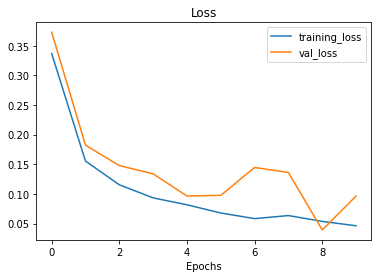

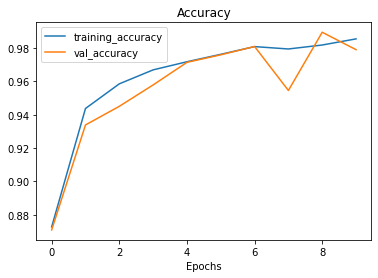

In [9]:
plot_loss_curves(history)


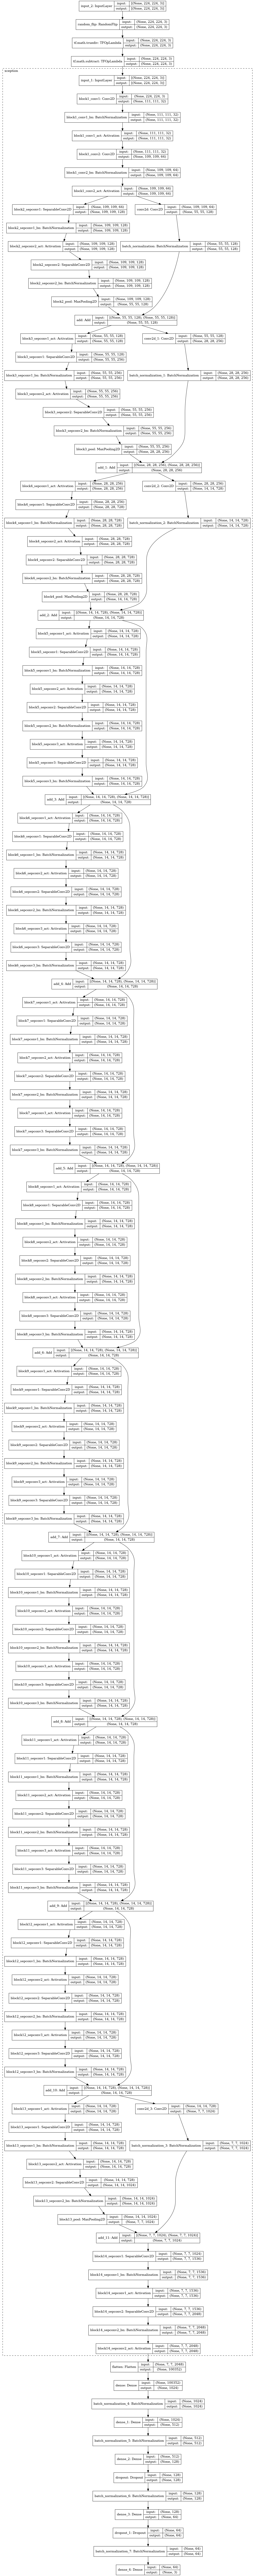

In [10]:
tf.keras.utils.plot_model(model, to_file='xception.png',expand_nested=True,show_shapes=True)


In [11]:
Accuracy['Xception'] = history.history['accuracy'][-1]

In [12]:
Accuracy['Xception']

0.9855538010597229

In [13]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model.evaluate(val_dataset)
print('test accuracy : ', test_acc)

132/132 [==============================] - 346s 3s/step - loss: 0.0964 - accuracy: 0.9791
test accuracy :  0.9790725111961365


In [14]:
model.save('Xception.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
